In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#With 15 generations
global_res = pd.read_csv("./comb_SIMOUT.txt", sep="\t", header=0, low_memory=False)
print(global_res.shape)
display(global_res)

#disc_res = pd.read_csv("./disc_SIMOUT.txt", sep="\t", header=0, low_memory=False)
test = global_res[global_res['intersp_competition_b']!=-1]
test = test[test['intersp_competition_b']!=0]
test = test[test['community_assembly_model']=='pairwise_competition']
test = test[test['generation']>400]
display(test)
print(len(test))

(32626, 86)


,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,250.0,500000.0,2.0,0.7,2.0,1.0,5.37926,-1.0,4.69554,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00144,0.58824,-0.14967,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00281,0.0,0.0,-3.0,0.00281,0.0,0.02772,0.0,0.0,-3.0,0.02772,0.0,0.0,1.0,1.0,1.0,1.0,-1.32786,0.0,0.0,-3.0,-1.32786,0.0,-0.85026,2.57322,0.86515,1.81974,-1.19066,1.77671,0.47760,2.57322,0.86515,4.81974,0.13720,1.77671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,250.0,500000.0,2.0,0.7,2.0,1.0,2.88426,-1.0,0.30242,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00102,0.00154,0.58824,0.27672,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01275,0.0,0.0,-3.0,0.01275,0.0,0.02544,0.0,0.0,-3.0,0.02544,0.0,0.0,1.0,1.0,1.0,1.0,0.79283,0.0,0.0,-3.0,0.79283,0.0,2.77914,3.57439,0.66255,0.73091,1.33926,4.49896,1.98631,3.57439,0.66255,3.73091,0.54644,4.49896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,250.0,500000.0,2.0,0.7,2.0,1.0,0.00357,-1.0,0.00143,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00145,0.58824,-8.13606,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00838,0.0,0.0,-3.0,0.00838,0.0,0.03193,0.0,0.0,-3.0,0.03193,0.0,0.0,1.0,1.0,1.0,1.0,-3.08982,0.0,0.0,-3.0,-3.08982,0.0,-2.76159,1.91774,0.51970,1.87384,-2.96007,1.50923,0.32823,1.91774,0.51970,4.87384,0.12974,1.50923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,250.0,500000.0,2.0,0.7,2.0,1.0,4.98661,-1.0,0.16229,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,2000.0,0.001,0.0005,500.0,1.0,0.00097,0.00143,0.58824,-0.26311,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.01193,0.0,0.0,-3.0,0.01193,0.0,0.02404,0.0,0.0,-3.0,0.02404,0.0,0.0,1.0,1.0,1.0,1.0,-4.71676,0.0,0.0,-3.0,-4.71676,0.0,-3.26723,2.94005,0.86006,0.23087,-4.41550,4.25476,1.44953,2.94005,0.86006,3.23087,0.30126,4.25476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32621,250.0,500000.0,2.0,0.7,2.0,1.0,0.46995,-1.0,0.46995,-1.0,0.0,500.0,pairwise_competition,point_mutation,0.0,2000.0,570.0,200

,S_m,J_m,speciation_rate,death_proportion,trait_rate_meta,ecological_strength,intrasp_competition_a,intrasp_competition_b,intersp_competition_a,intersp_competition_b,mutualism_proportion,generations,community_assembly_model,speciation_model,mutation_rate,alpha,sequence_length,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
13847,250.0,750000.0,2.0,0.7,2.0,0.02619,108.42566,0.06394,0.00078,70.34116,0.93379,0.0,pairwise_competition,point_mutation,0.0,5122.0,570.0,1614.0,0.00493,0.00229,408.00000,0.58612,0.00493,0.00652,0.58824,0.40368,11.0,2.07551,1.97358,1.94256,1.91830,1.55700,1.23868,1.17826,1.15709,0.00116,0.00326,2.82592,6.03072,0.00000,0.00035,0.00874,0.00830,0.38587,-1.54768,0.00228,0.01509,0.0,2.52404,2.11357,2.07746,2.06551,1.09297,2.57884,-0.31835,0.17094,1.20359,3.13138,1.80415,1.92624,-2.61815,9.77113,2.18133,1.07965,0.71118,-0.65260,-2.29980,9.60019,0.97774,-2.05173,0.61257,0.69325,-0.20067,0.30628,-0.52727,-0.38021,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14208,250.0,750000.0,2.0,0.7,2.0,0.04695,98.69049,0.05568,0.00427,5.07257,0.39645,0.0,pairwise_competition,point_mutation,0.0,5410.0,570.0,1110.0,0.00218,0.00387,924.00000,0.68468,0.00221,0.00579,0.58824,0.03048,3.0,1.87792,1.76372,1.68775,1.63571,1.17706,1.07987,1.06056,1.05368,0.00304,0.00405,0.70314,-1.50000,0.00035,0.00439,0.01602,0.00984,-0.70643,-1.50000,0.02281,0.01053,0.0,2.17624,2.15743,2.15553,2.15489,-4.37075,0.53123,-0.65210,-1.50000,-4.08426,0.60146,-3.70213,1.48651,3.02461,10.98960,-3.99323,0.89630,0.66863,0.95528,3.67671,12.48960,0.09102,0.29484,0.50000,0.50000,0.50000,1.00000,-0.50000,-0.50000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15831,250.0,750000.0,2.0,0.7,2.0,0.03378,0.07855,1.87875,0.00013,106.66240,0.77739,0.0,pairwise_competition,point_mutation,0.0,8085.0,570.0,1482.0,0.00104,0.00055,609.00000,1.00000,0.00114,0.00152,0.58824,4.88722,1.0,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-3.00000,0.00000,0.00000,0.00175,0.00000,0.00000,-3.00000,0.00175,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,-0.53209,0.00000,0.00000,-3.00000,-0.53209,0.00000,-0.38833,2.66578,1.25345,1.60082,-1.17774,1.99398,0.14376,2.66578,1.25345,4.60082,-0.64565,1.99398,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16061,250.0,750000.0,2.0,0.7,2.0,0.02281,571.45584,0.01506,4.75160,0.35807,0.27853,0.0,pairwise_competition,point_mutation,0.0,3914.0,570.0,1282.0,0.00389,0.00301,413.00000,0.14821,0.00383,0.00627,0.58824,-0.36501,1.0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.01224,0.00000,0.00000,-3.00000,0.01224,0.00000,0.01281,0.00000,0.00000,-3.00000,0.01281,0.00000,0.0,1.00000,1.00000,1.00000,1.00000,0.16370,0.00000,0.00000,-3.00000,0.16370,0.00000,0.24980,2.26156,-0.30593,7.35737,0.15751,1.05201,0.08610,2.26156,-0.30593,10.35737,-0.00619,1.05201,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16248,250.0,750000.0,2.0,0.7,2.0,0.53979,98.39030,0.02042,0.00382,3.89725,0.41786,0.0,pairwise_competition,point_mutation,0.0,3034.0,570.0,1251.0,0.00482,0.00143,1301.95843,0.48681,0.00476,0.00563,0.58824,-0.07947,

362


In [2]:
neutral=global_res[global_res["community_assembly_model"]=="neutral"]
filtering=global_res[global_res["community_assembly_model"]=="filtering"]
pairwise_competition=global_res[global_res["community_assembly_model"]=="pairwise_competition"]
print(pairwise_competition.shape)
pairwise_competition=pairwise_competition[pairwise_competition["generations"]=="0.0"]
print(pairwise_competition.shape)

mean=global_res[global_res["community_assembly_model"]=="competition"]
print(mean.shape)
mean=mean[mean["generations"]=="0.0"]
print(mean.shape)

print(filtering.shape)
filtering=filtering[filtering["generations"]=="0.0"]
print(filtering.shape)

print(neutral.shape)
neutral=neutral[neutral["generations"]=="0.0"]
print(neutral.shape)



display(pw_nomut.shape, pw_mut.shape, pw_allmut.shape)
print(pairwise_competition.shape)
print(len(pw_nomut)+len(pw_mut)+len(pw_allmut))
display(pw_nomut, pw_mut, pw_allmut)

(11536, 86)
(6409, 86)
(6472, 86)
(6472, 86)
(6594, 86)
(6594, 86)
(6573, 86)
(6573, 86)


NameError: name 'pw_nomut' is not defined

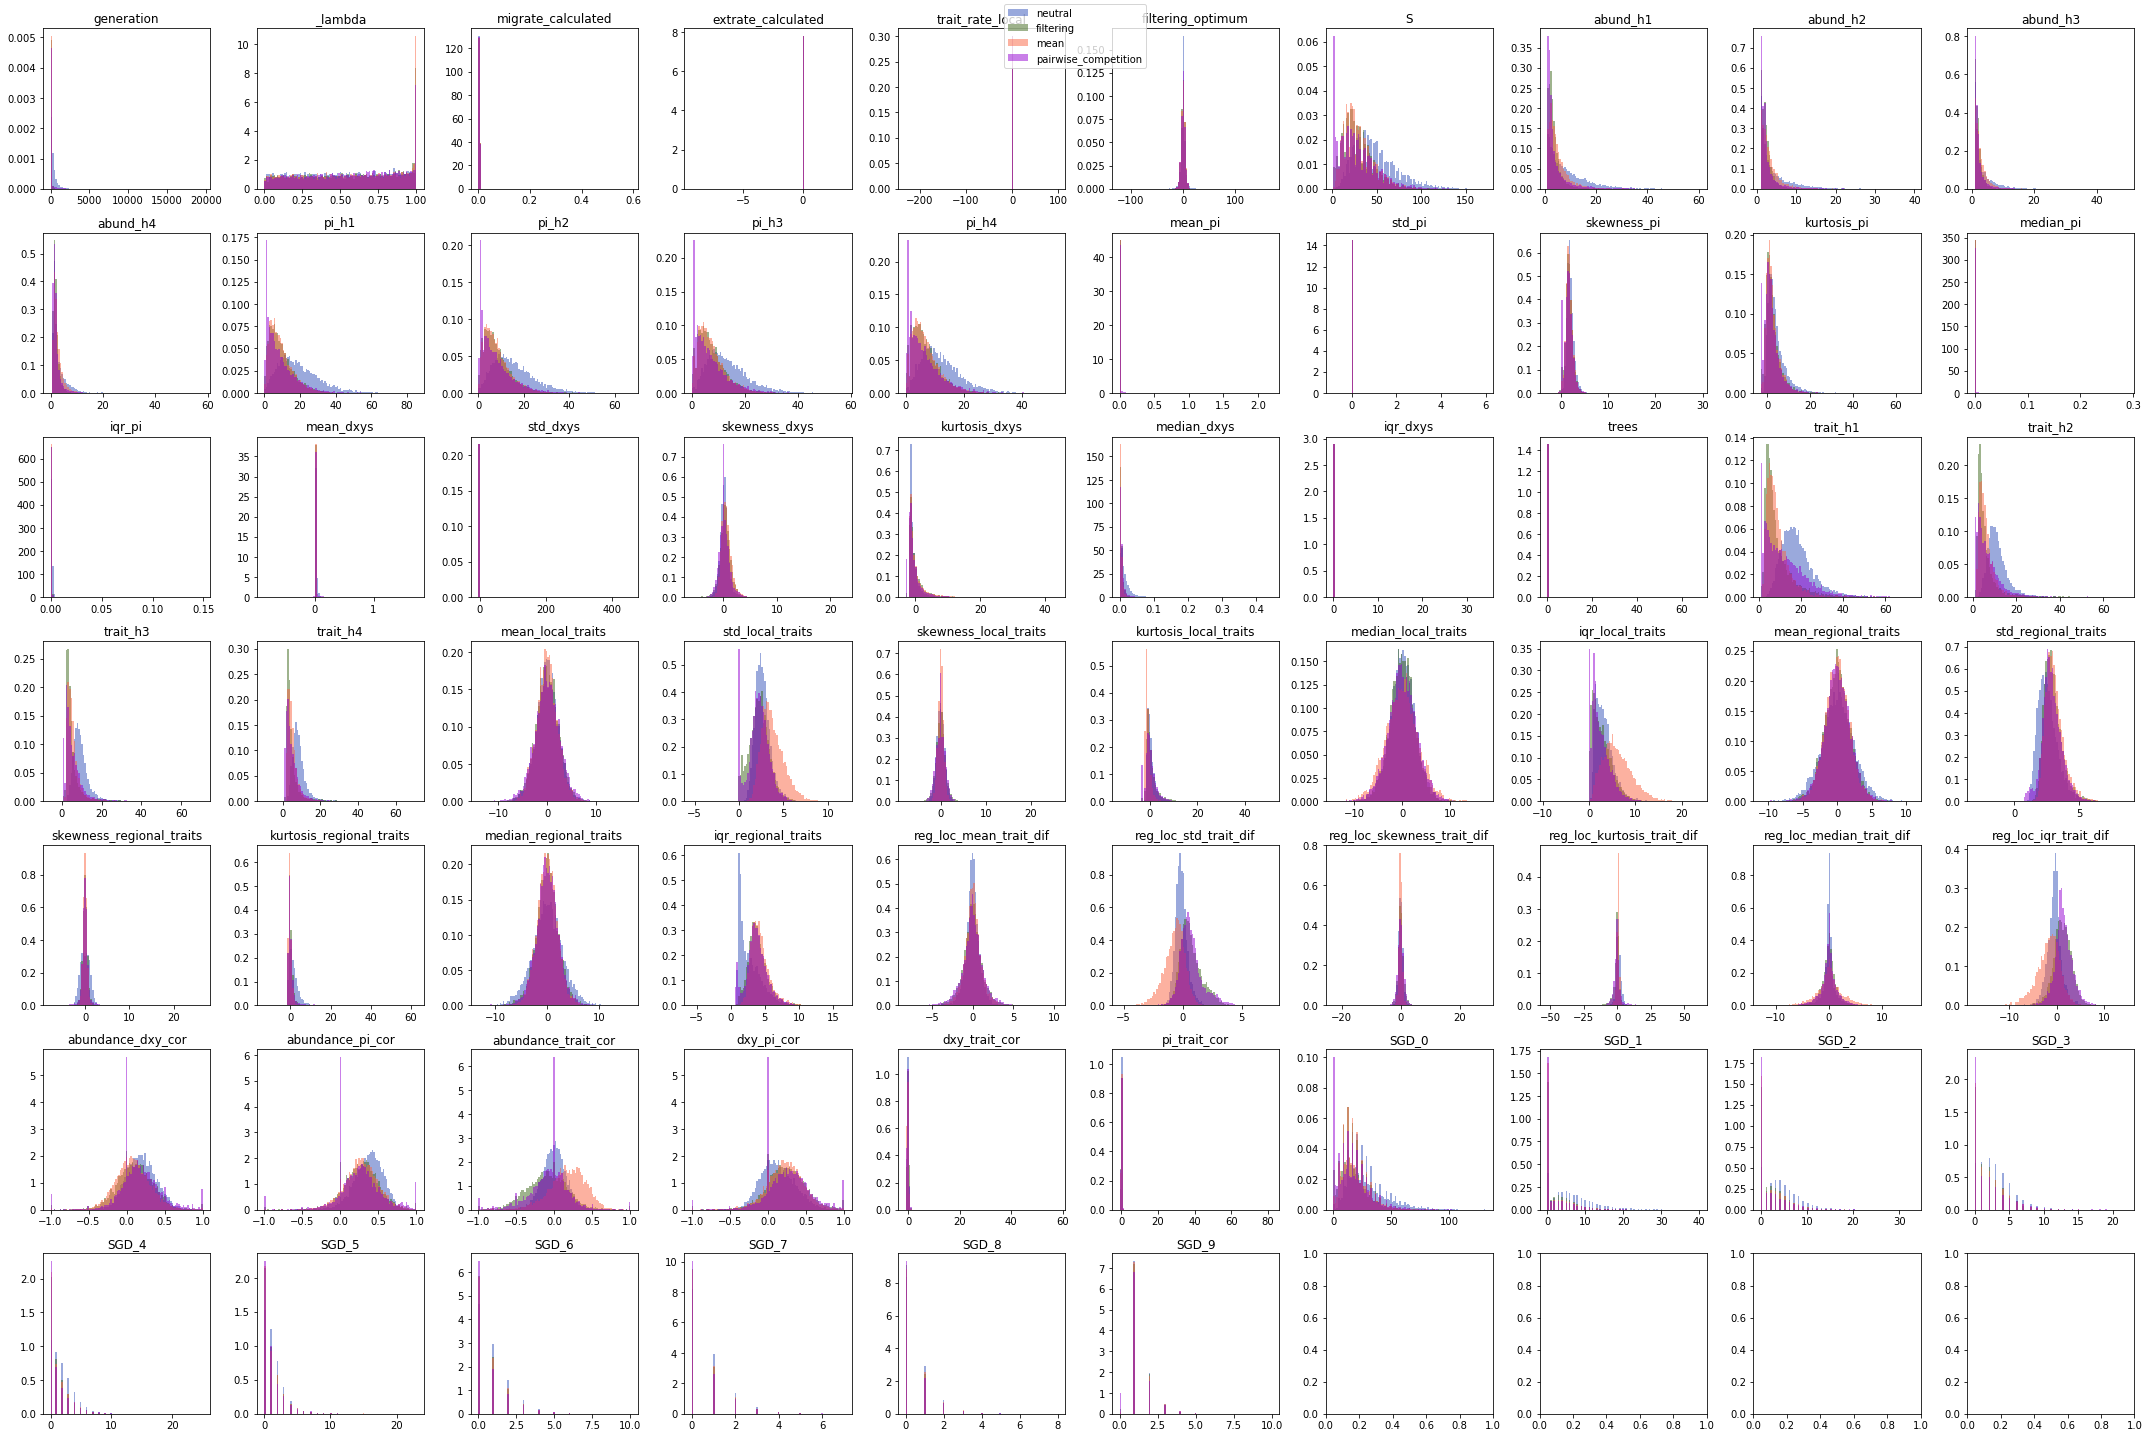

In [4]:
#light yellow is no mutualism
#dark yellow is with mutualism
#red is mean competition
#blue is neutral
#green is filtering

fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(neutral.columns)[20:], axs):
    b=np.linspace(np.min(global_res[p]),np.max(global_res[p]),100)
    ax.hist(neutral[p], color='#3755BB', density=True, bins=b, alpha=0.5, label="neutral")
    ax.hist(filtering[p], color='#3F681C', density=True, bins=b, alpha=0.5, label="filtering")
    ax.hist(mean[p], color='#FB6542', density=True, bins=b, alpha=0.5, label="mean")
    ax.hist(pairwise_competition[p], color='#9400D3', density=True, bins=b, alpha=0.5, label="pairwise_competition")
    #ax.hist(pw_mut[p], color='#774400', density=True, bins=b, alpha=0.5)
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./global_analysis_100bins.png')

/home/juliette/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juliette/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


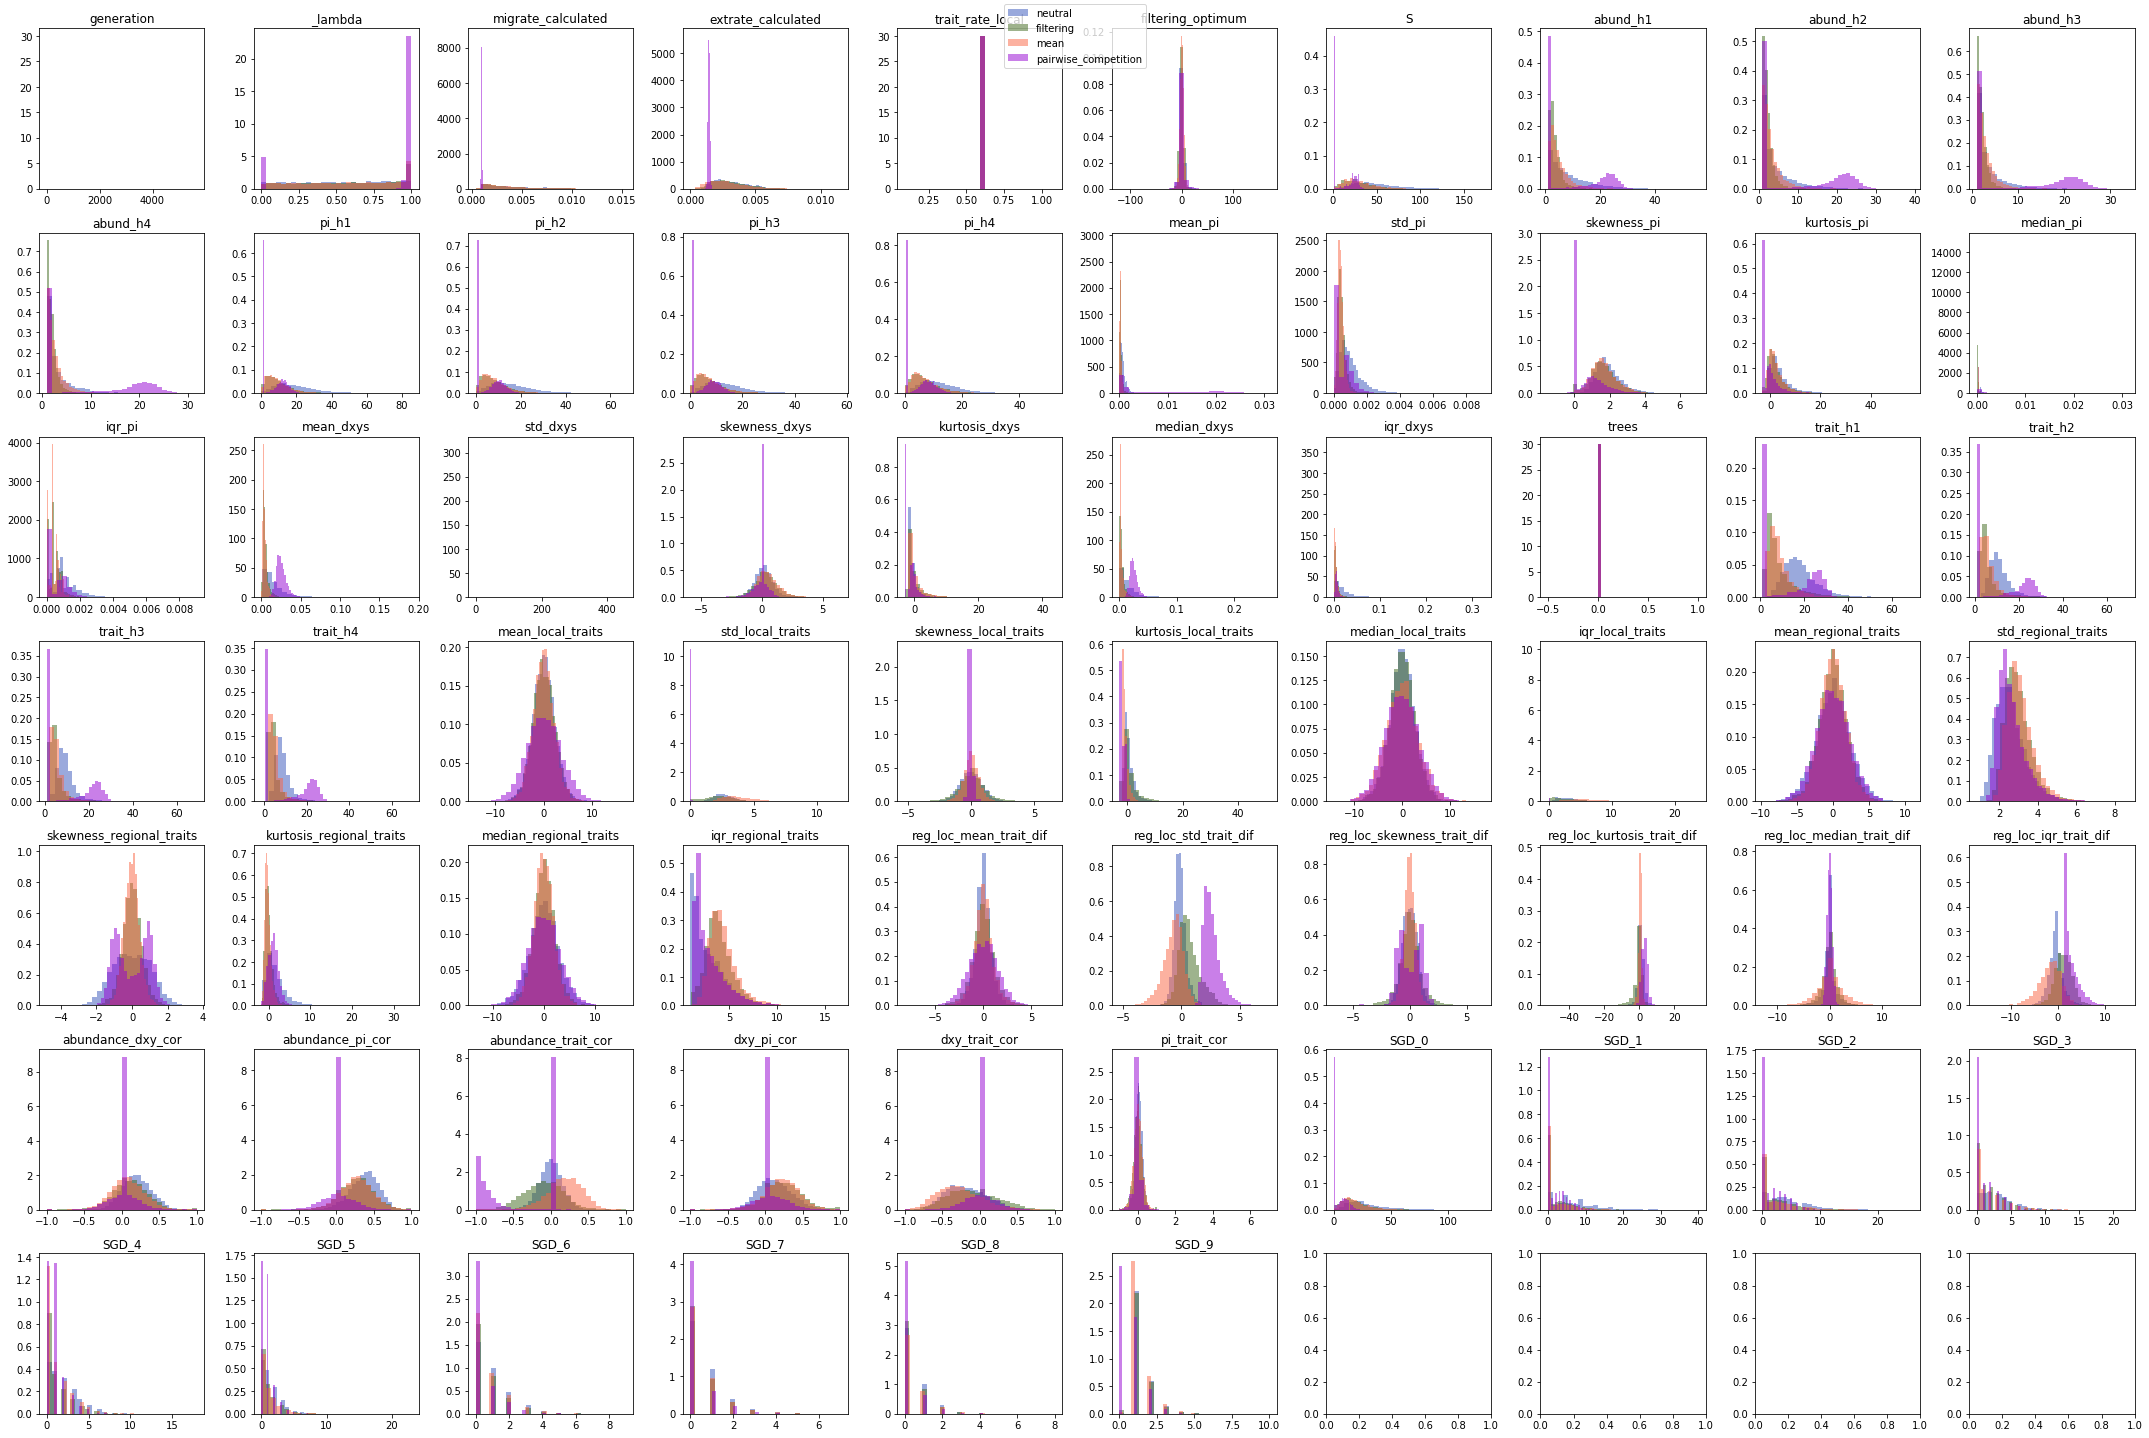

In [33]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(neutral.columns)[20:], axs):
    ax.hist(neutral[p], color='#3755BB', density=True, bins=30, alpha=0.5, label="neutral")
    ax.hist(filtering[p], color='#3F681C', density=True, bins=30, alpha=0.5, label="filtering")
    ax.hist(mean[p], color='#FB6542', density=True, bins=30, alpha=0.5, label="mean")
    ax.hist(pairwise_competition[p], color='#9400D3', density=True, bins=30, alpha=0.5, label="pairwise_competition")
    #ax.hist(pw_mut[p], color='#774400', density=True, bins=b, alpha=0.5)
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./global_analysis_nobins.png')

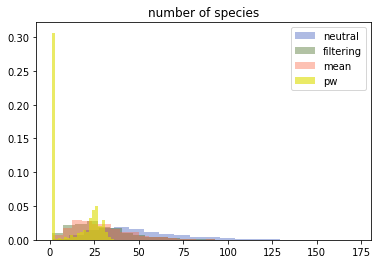

In [41]:
#light yellow is no mutualism
#dark yellow is with mutualism
#red is mean competition
#blue is neutral
#green is filtering


plt.hist(neutral["S"], color='#3755BB', density=True, bins=20, alpha=0.4, label="neutral")
plt.hist(filtering["S"], color='#3F681C', density=True, bins=20, alpha=0.4, label="filtering")
plt.hist(mean["S"], color='#FB6542', density=True, bins=20, alpha=0.4, label="mean")
plt.hist(pairwise_competition["S"], color='#DDDD00', density=True, bins=20, alpha=0.6, label="pw")
plt.title("number of species")
plt.legend()
plt.savefig('./number_species_global_comparison.png')

In [5]:
pairwise_competition=global_res[global_res["community_assembly_model"]=="pairwise_competition"]
print(pairwise_competition.shape)
pairwise_competition=pairwise_competition[pairwise_competition["generations"]=="500.0"]
print(pairwise_competition.shape)

(11536, 86)
(5127, 86)


In [6]:
pw_nomut=pairwise_competition[pairwise_competition["mutualism_proportion"]=="0.0"]
pw_mut=pairwise_competition[pairwise_competition["mutualism_proportion"]!="0.0"]
pw_mut=pw_mut[pw_mut["mutualism_proportion"]!="1.0"]
pw_allmut=pairwise_competition[pairwise_competition["mutualism_proportion"]=="1.0"]
print(len(pw_nomut), len(pw_mut), len(pw_allmut))
pw_nomut=pw_nomut[pw_nomut["generations"]=="500.0"]
pw_mut=pw_mut[pw_mut["generations"]=="500.0"]
pw_allmut=pw_allmut[pw_allmut["generations"]=="500.0"]
print(len(pw_nomut), len(pw_mut), len(pw_allmut))

2418 1898 811
2418 1898 811


In [7]:
pw_low = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])<0.1]
pw_high = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])>0.9]
pw_close = pd.concat([pw_low,pw_high])

pw_tot = pd.concat([pw_nomut, pw_allmut])

pw_mid = pw_mut[pd.to_numeric(pw_mut["mutualism_proportion"])>0.1]
pw_mid = pw_mid[pd.to_numeric(pw_mid["mutualism_proportion"])<0.9]

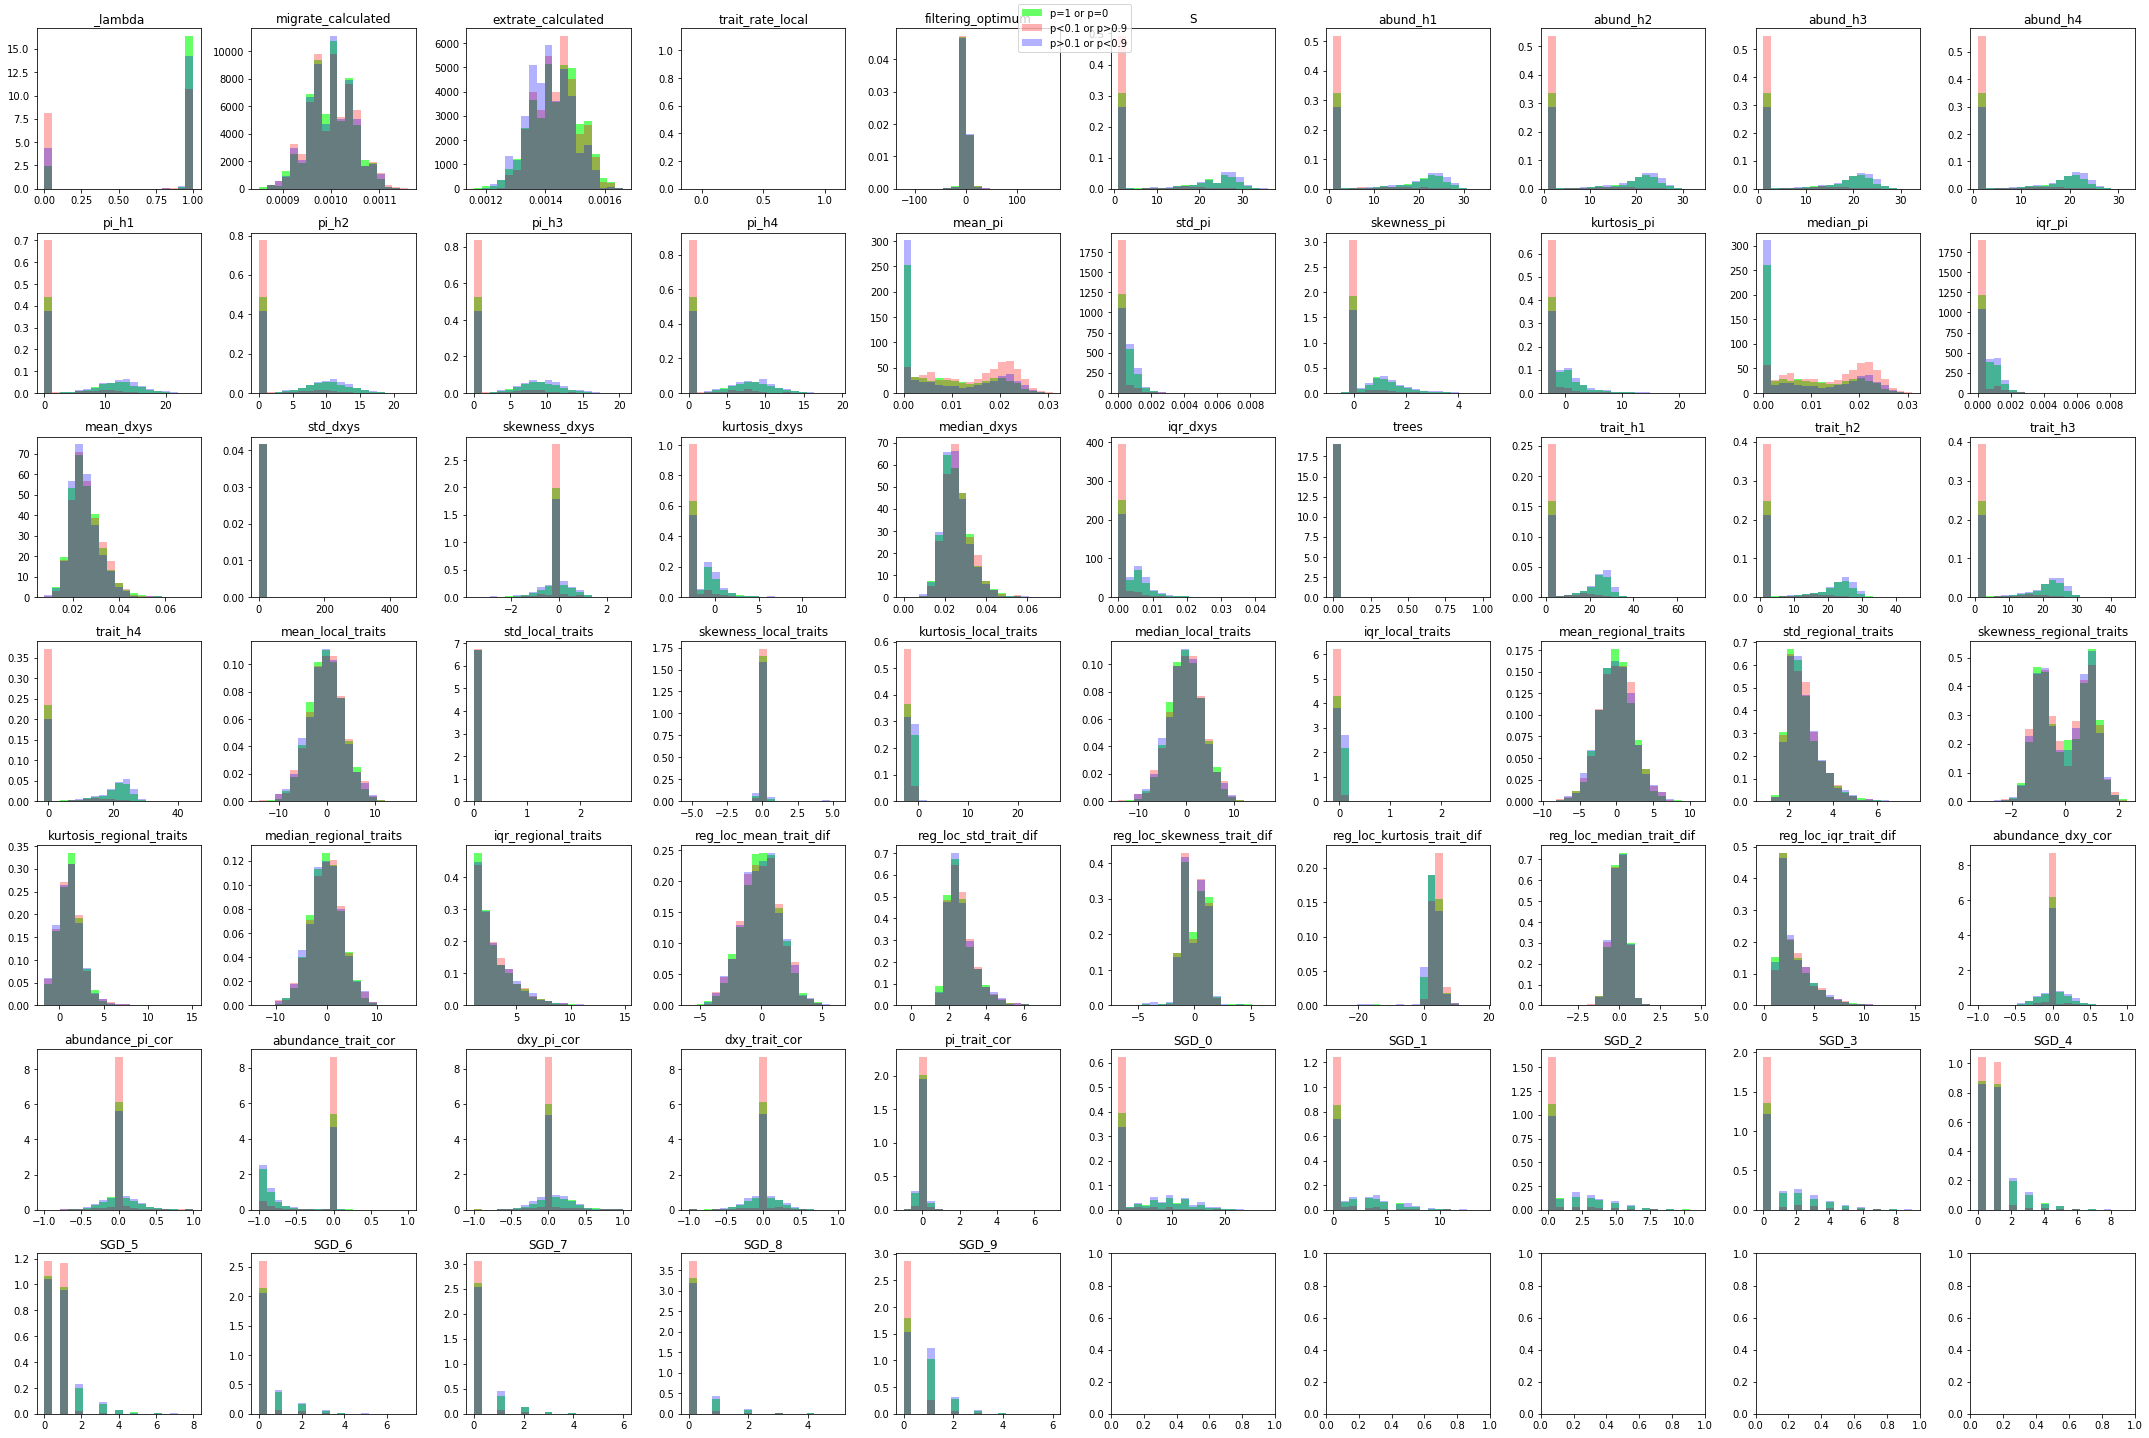

In [40]:
#light yellow is no mutualism
#green is with mutualism
########green is all pairwise
#purple is mutualism=1
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pairwise_competition[p]),20)
    ax.hist(pw_tot[p], color='#00FF00', density=True, bins=b, alpha=0.6, label='p=1 or p=0')
    ax.hist(pw_close[p], color='#FF0000', density=True, bins=b, alpha=0.3, label='p<0.1 or p>0.9')
    ax.hist(pw_mid[p], color='#0000FF', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./pairwise_analysis.png')

It is shown here that there is a discontinuity with the mutualism proportion : can not be estimated thourgh classical regression ?

In [23]:
# Test discontinuity for interaction terms (all same VS existing variations)
# Test afterward with difference intraspecific/interspecific ? (all same VS divergence between both ?)

pw_const=pairwise_competition[pd.to_numeric(pairwise_competition["intrasp_competition_b"]) == -1.0]
print(pw_const.shape)
pw_var=pairwise_competition[pd.to_numeric(pairwise_competition["intrasp_competition_b"]) != -1.0]
print(pw_var.shape)
pw_allmostcont=pw_var[pd.to_numeric(pw_var["intersp_competition_a"])*pd.to_numeric(pw_var["intersp_competition_b"])**2<0.09]
pw_allmostcont=pw_allmostcont[pd.to_numeric(pw_allmostcont["intrasp_competition_a"])*pd.to_numeric(pw_allmostcont["intrasp_competition_b"])**2<0.09]

print(pw_allmostcont.shape)


(5127, 86)
(0, 86)
(0, 86)


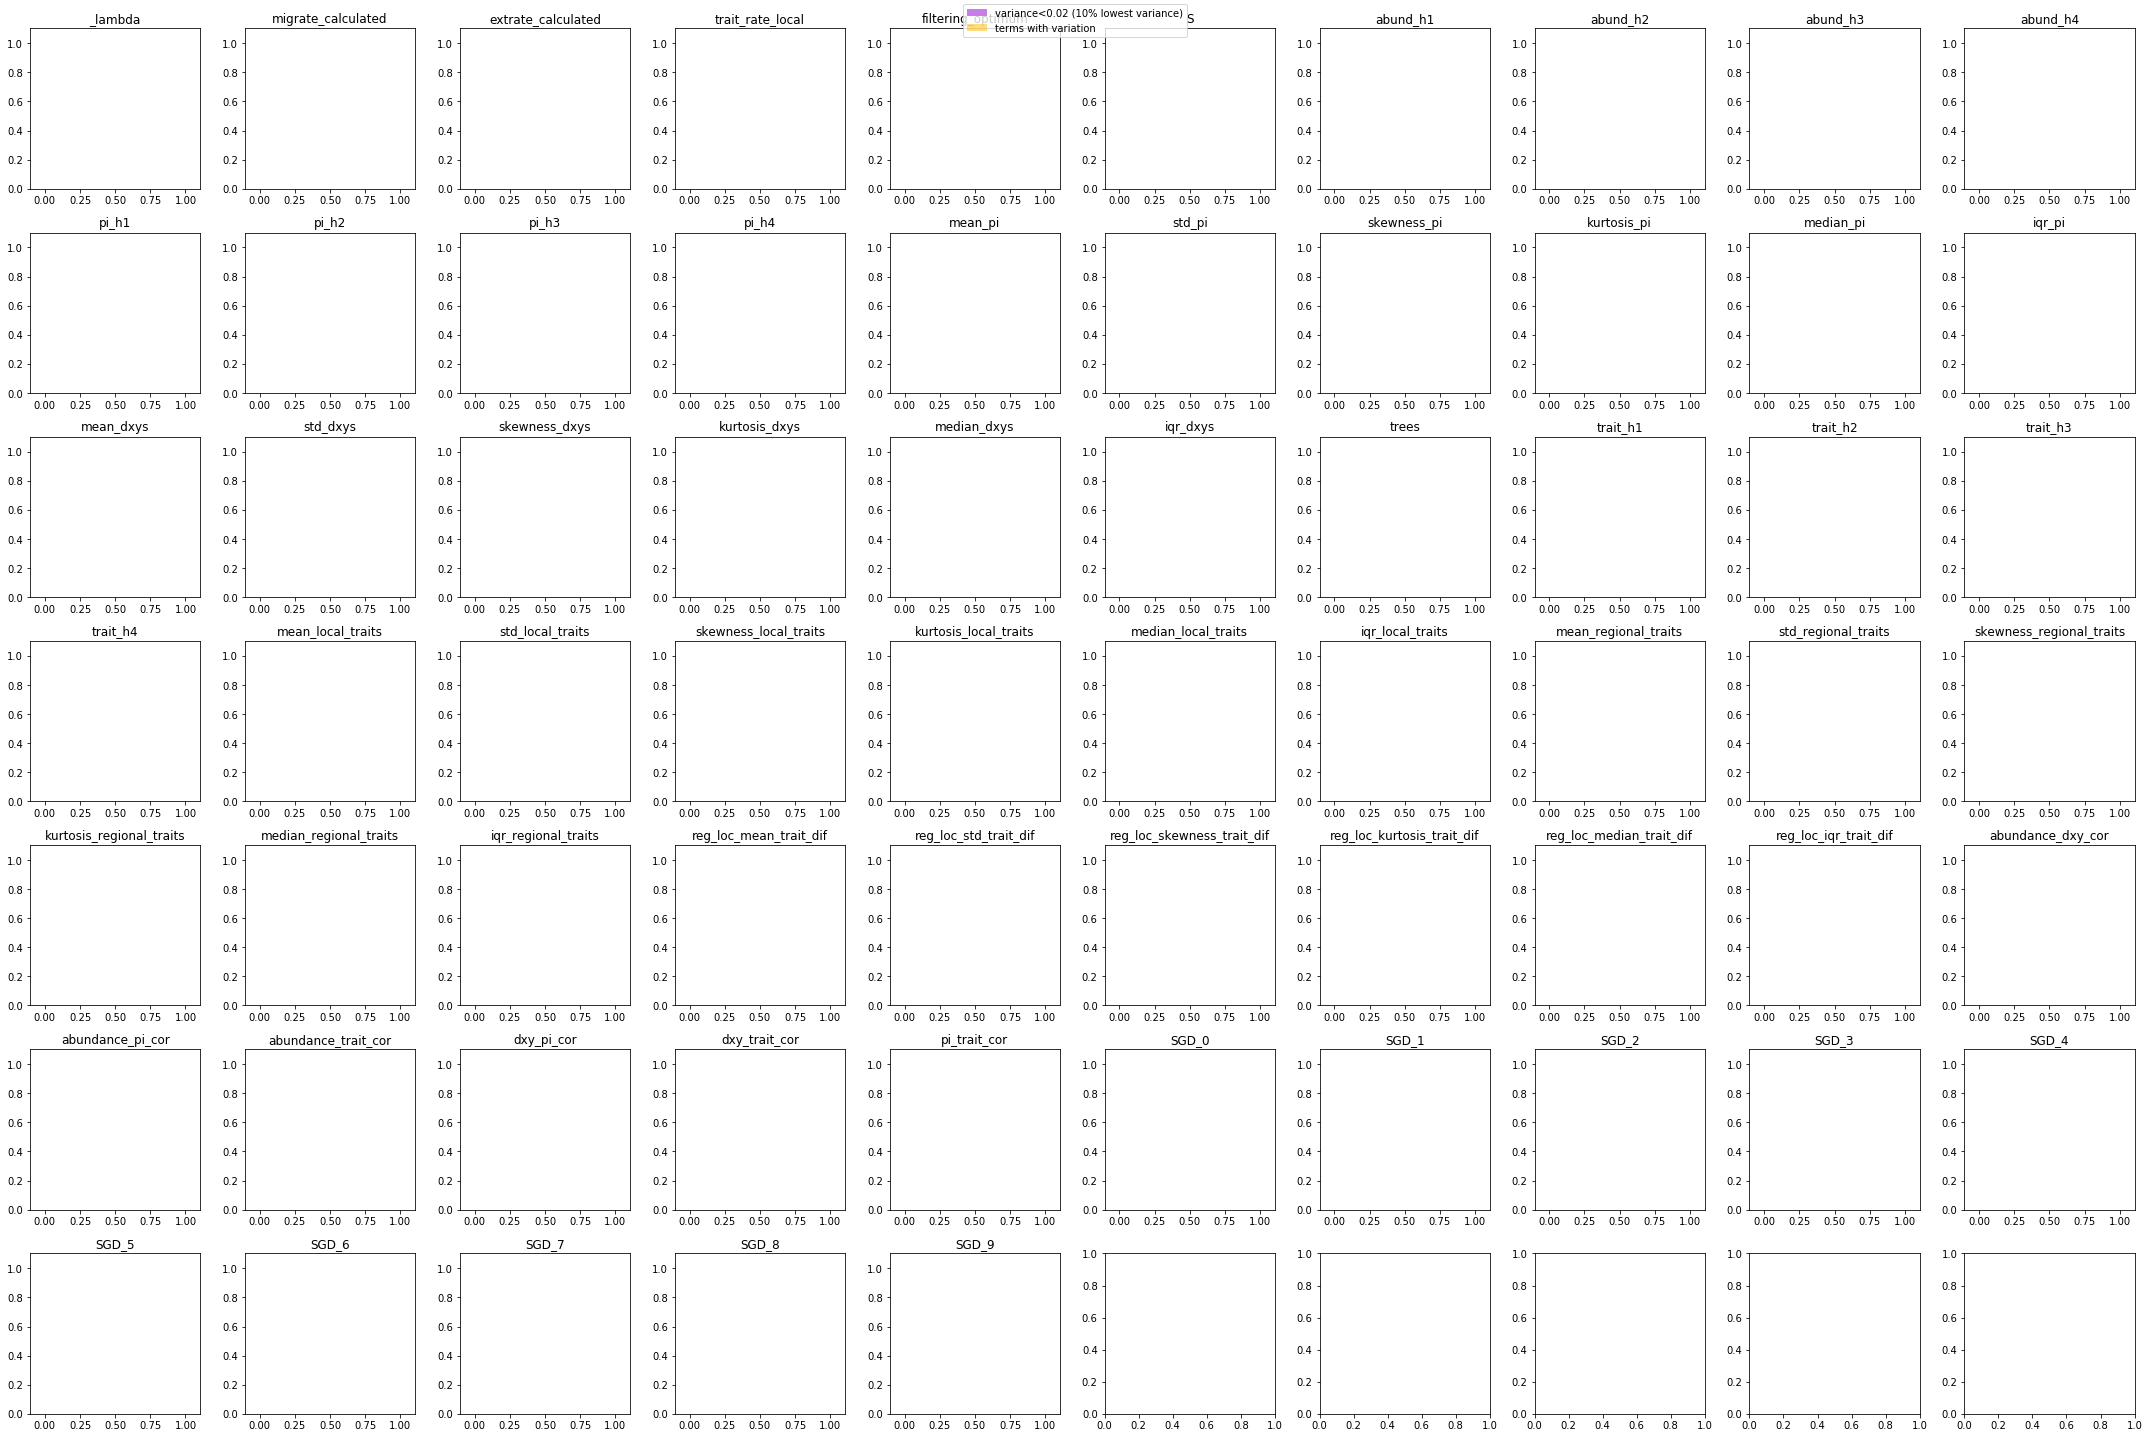

In [24]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pairwise_competition[p]),20)
    ax.hist(pw_allmostcont[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='variance<0.02 (10% lowest variance)')
    ax.hist(pw_var[p], color='#FFBB00', density=True, bins=b, alpha=0.5, label='terms with variation')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis.png')

In [8]:
pw_500=pairwise_competition[pairwise_competition["generations"]=="500.0"]
pw_id=pw_500[pw_500["intersp_competition_a"]==pw_500["intrasp_competition_a"]]
print(pw_500.shape, pw_id.shape)
pw_close=pw_500[pd.to_numeric(pw_500["intersp_competition_a"])-pd.to_numeric(pw_500["intrasp_competition_a"])<0.01]
pw_close=pw_close[pw_close["intersp_competition_a"]!=pw_close["intrasp_competition_a"]]
pw_far=pw_500[pd.to_numeric(pw_500["intersp_competition_a"])-pd.to_numeric(pw_500["intrasp_competition_a"])>0.01]
print(pw_close.shape, pw_far.shape)

pw_inter=pw_far[pd.to_numeric(pw_far["intersp_competition_a"])>pd.to_numeric(pw_far["intrasp_competition_a"])]
pw_intra=pw_far[pd.to_numeric(pw_far["intersp_competition_a"])<pd.to_numeric(pw_far["intrasp_competition_a"])]
print(pw_inter.shape, pw_intra.shape)
print(np.array(pw_far["intersp_competition_a"])[0])
for i in range(len(pw_far)):
    print(np.array(pw_far["intersp_competition_a"])[i],np.array(pw_far["intrasp_competition_a"])[i])

(5127, 86) (356, 86)
(2612, 86) (2159, 86)
(2159, 86) (0, 86)
0.67373
0.67373 0.00168
4.4200099999999996 4.24915
2.3877900000000003 0.00112
1.58724 1.12151
4.36845 2.90962
4.33131 1.3244799999999999
6.63674 0.8974799999999999
0.18847 0.00213
3.54359 0.0192
1.31715 0.013590000000000001
0.06377000000000001 0.00971
0.07917 0.00252
0.29003 0.00496
0.08453 0.029419999999999998
0.46786000000000005 0.0031899999999999997
0.26153000000000004 0.11305
8.80211 0.02047
1.54244 0.9828100000000001
1.2153399999999999 0.0017
5.27875 0.00885
0.14667 0.04718
1.39877 0.33685
1.26521 0.06414
0.04591 0.00713
2.7912 0.00135
0.43699 0.006690000000000001
0.9489200000000001 0.4803
0.48455 0.17242000000000002
0.29041999999999996 0.00476
4.94625 0.00454
0.1181 0.0379
0.95676 0.00524
4.7244 0.00115
0.027839999999999997 0.00988
0.01435 0.00301
0.1082 0.09237999999999999
0.0275 0.017480000000000002
0.35923 0.02014
1.4204299999999999 0.00513
0.05851 0.04541
0.11039000000000002 0.00761
1.88316 1.84807
7.64838999999999

0.21126999999999999 0.11175999999999998
0.036789999999999996 0.0021100000000000003
0.1161 0.02984
0.84857 0.03355
2.95527 0.06344
3.16106 0.00614
0.16360999999999998 0.00101
3.11416 0.0066
0.18350999999999998 0.005
1.54904 0.00818
0.54981 0.00914
0.38198000000000004 0.01152
0.15521 0.03888
0.03293 0.00392
0.0286 0.00209
4.2297 0.00265
0.121 0.00808
0.6513800000000001 0.00938
0.03573 0.0012900000000000001
5.88836 0.005
0.10238 0.00132
0.68971 0.5756399999999999
1.73622 1.0644799999999999
3.7315 1.0278399999999999
1.29879 0.00551
0.02242 0.00144
0.25213 0.0010400000000000001
0.20323 0.00124
5.7908599999999995 0.03392
3.7489 0.24666
0.15057 0.038110000000000005
0.52558 0.43605
0.01805 0.00115
3.8149599999999997 0.03268
3.30251 0.27383
0.0259 0.00207
0.42378999999999994 0.20675
0.92194 0.57693
5.06758 0.5930300000000001
3.3326 0.09874
2.9217400000000002 0.09598
0.12212999999999999 0.00105
1.3657299999999999 1.1697600000000001
0.03135 0.006529999999999999
0.63539 0.01975
0.02243000000000000

5.61216 0.04535
0.28253 0.01616
9.25045 0.061860000000000005
3.59324 2.53367
2.60062 0.00277
1.1043399999999999 0.0017800000000000001
3.00473 0.009290000000000001
8.91713 0.031139999999999998
0.08732999999999999 0.0611
0.1811 0.007559999999999999
0.43712 0.04342
0.76371 0.05605
0.46847 0.01759
0.03203 0.00148
0.23738 0.00303
0.20435 0.00244
4.34468 1.0779299999999998
0.02161 0.0059700000000000005
6.8462 0.09601
0.6764899999999999 0.6311399999999999
0.16869 0.15100999999999998
8.08258 0.00101
2.63143 0.55953
1.44729 0.36456
0.04788 0.03399
0.0781 0.00365
4.99423 1.25721
5.83787 0.007390000000000001
0.052520000000000004 0.006370000000000001
0.33514 0.011559999999999999
2.80135 0.9706299999999999
0.7338600000000001 0.26579
0.32136 0.17743
6.07124 0.00446
3.88111 0.6262800000000001
2.14331 0.00205
1.9879200000000001 1.23777
0.09707 0.01175
5.88278 0.55566
2.86584 0.09963
5.9116800000000005 0.43445
1.9634900000000002 0.00396
3.3833300000000004 0.00225
1.56925 0.0031
5.5292699999999995 0.011

0.10021000000000001 0.001
2.54602 0.1739
0.44847 0.00864
1.70015 0.25973
0.02001 0.00245
0.8760399999999999 0.03102
2.79636 0.01925
0.29265 0.01935
0.34964 0.13557
0.05567999999999999 0.00632
3.01785 0.11499000000000001
1.3504399999999999 0.02153
0.11404 0.00143
0.09539 0.07675
2.57924 0.43304
3.54965 0.16421
0.74542 0.043210000000000005
2.24044 1.4501899999999999
0.13359000000000001 0.058210000000000005
0.31366 0.10371
7.729139999999999 0.00328
1.81615 0.0016300000000000002
9.84694 0.28265
8.23298 5.63349
5.56075 0.004520000000000001
8.05589 0.00264
0.15354 0.02111
2.2795400000000003 0.08459
0.03718 0.01035
1.1822700000000002 0.03979
0.15839 0.06602000000000001
0.06168 0.01009
1.09131 0.055020000000000006
3.0093 0.023790000000000002
0.49831000000000003 0.01819
3.5405 0.41886999999999996
4.07416 0.05728
1.54026 0.16977
0.65732 0.58727
6.584230000000001 0.00118
2.7867599999999997 0.00823
0.15612 0.0339
4.63974 0.07554
0.01585 0.0037600000000000003
0.16895 0.0059700000000000005
1.33981 0

0.90671 0.26445
0.6469699999999999 0.10977999999999999
0.53363 0.32697
0.2222 0.15427000000000002
0.30672 0.1392
0.54282 0.13253
0.56533 0.12079000000000001
0.5643199999999999 0.34508


/home/juliette/.local/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges


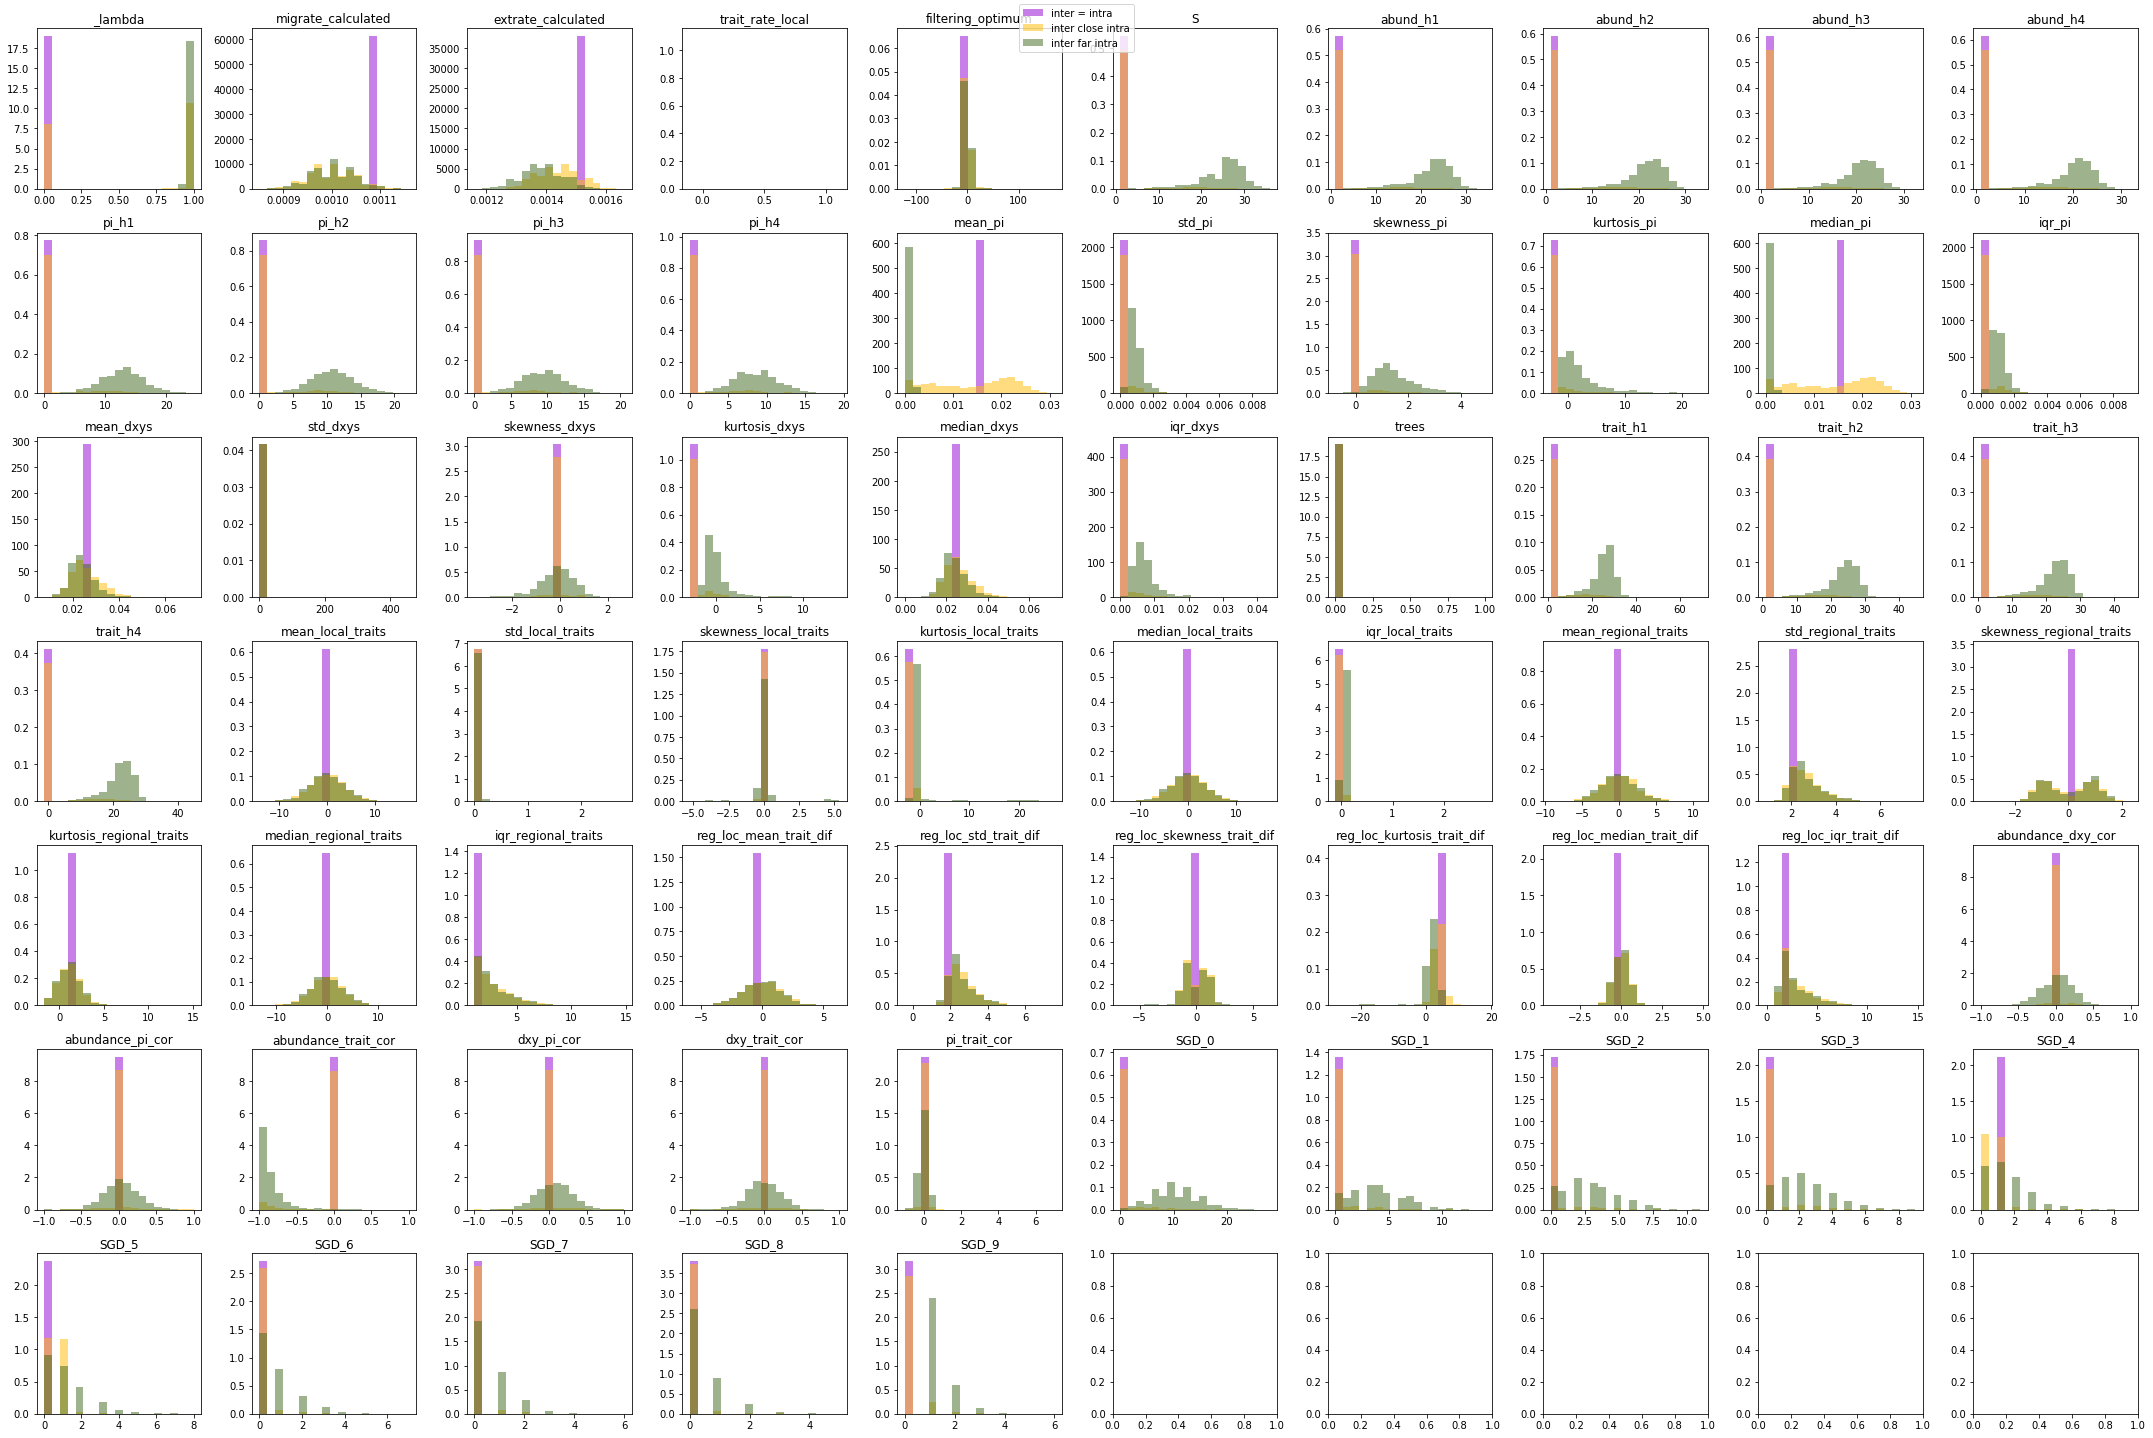

In [79]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_id[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='inter = intra')
    ax.hist(pw_close[p], color='#FFBB00', density=True, bins=b, alpha=0.5, label='inter close intra')
    ax.hist(pw_far[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='inter far intra')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_comp_terms.png')

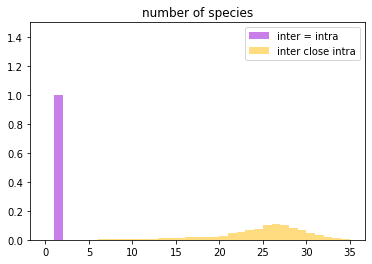

In [19]:
pw_id=pw_id[pw_id["mutualism_proportion"]!="0.0"]
pw_id=pw_id[pw_id["mutualism_proportion"]!="1.0"]
pw_close=pw_close[pw_close["mutualism_proportion"]!="0.0"]
pw_close=pw_close[pw_close["mutualism_proportion"]!="1.0"]
pw_far=pw_far[pw_far["mutualism_proportion"]!="0.0"]
pw_far=pw_far[pw_far["mutualism_proportion"]!="1.0"]

b = np.arange(0,np.max(pw_500["S"]))
plt.hist(pw_id["S"], color='#9400D3', density=True, bins=b, alpha=0.5, label='inter = intra')
plt.hist(pw_inter["S"], color='#FFBB00', density=True, bins=b, alpha=0.5, label='inter close intra')
#plt.hist(pw_intra["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='inter far intra')
plt.title("number of species")
plt.legend()
plt.ylim(0,1.5)
plt.savefig('./number_species_comparison_term.png')

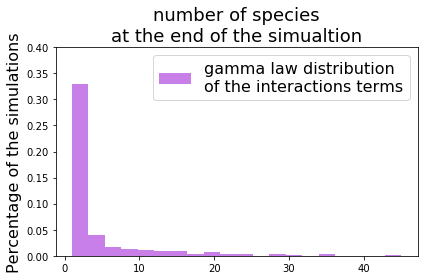

In [3]:
test.to_csv('../internship_m1/data/trait_expl/pw_plot_sp_gamma.csv')

b = np.arange(0,np.max(test["S"]))
plt.hist(test["S"], color='#9400D3', density=True, bins=20, alpha=0.5, label='gamma law distribution\nof the interactions terms')
#plt.hist(pw_inter["S"], color='#FFBB00', density=True, bins=b, alpha=0.5, label='inter close intra')
#plt.hist(pw_intra["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='inter far intra')
plt.title("number of species\nat the end of the simualtion", size=18)
plt.ylabel('Percentage of the simulations', size=16)
plt.legend(prop={'size': 16})
plt.ylim(0,0.4)
plt.tight_layout()
plt.savefig('data_pics/number_species_comparison_term_gamma.png')

(919, 86)
(353, 86)


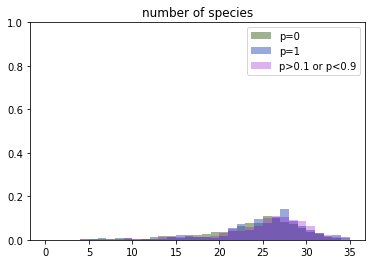

In [21]:
b = np.arange(0,np.max(pw_500["S"]))
pw0=pw_inter[pw_inter["mutualism_proportion"]=="0.0"]
print(pw0.shape)
pw1=pw_inter[pw_inter["mutualism_proportion"]=="1.0"]
print(pw1.shape)
pw_mid=pw_inter[pw_inter["mutualism_proportion"]!="0.0"]
pw_mid=pw_mid[pw_mid["mutualism_proportion"]!="1.0"]
pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
plt.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
plt.hist(pw1["S"], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
#plt.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
#plt.hist(pw_close1["S"], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
plt.hist(pw_mid["S"], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
plt.title("number of species")
plt.legend()
plt.ylim(0,1)
plt.savefig('./number_species_comparison_mut0_2.png')

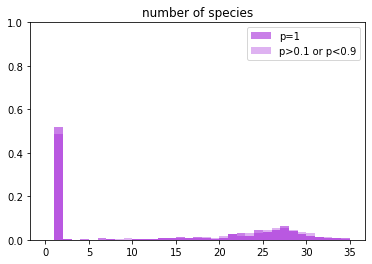

In [12]:
b = np.arange(0,np.max(pw_500["S"]))
pw0=pw_tot[pw_tot["mutualism_proportion"]=="0.0"]
pw1=pw_tot[pw_tot["mutualism_proportion"]=="1.0"]
pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
#plt.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
plt.hist(pw1["S"], color='#9400D3', density=True, bins=b, alpha=0.5, label='p=1')
#plt.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
#plt.hist(pw_close1["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p>0.9')
plt.hist(pw_mid["S"], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
plt.title("number of species")
plt.legend()
plt.ylim(0,1)
plt.savefig('./number_species_comparison_mut1_2.png')

/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


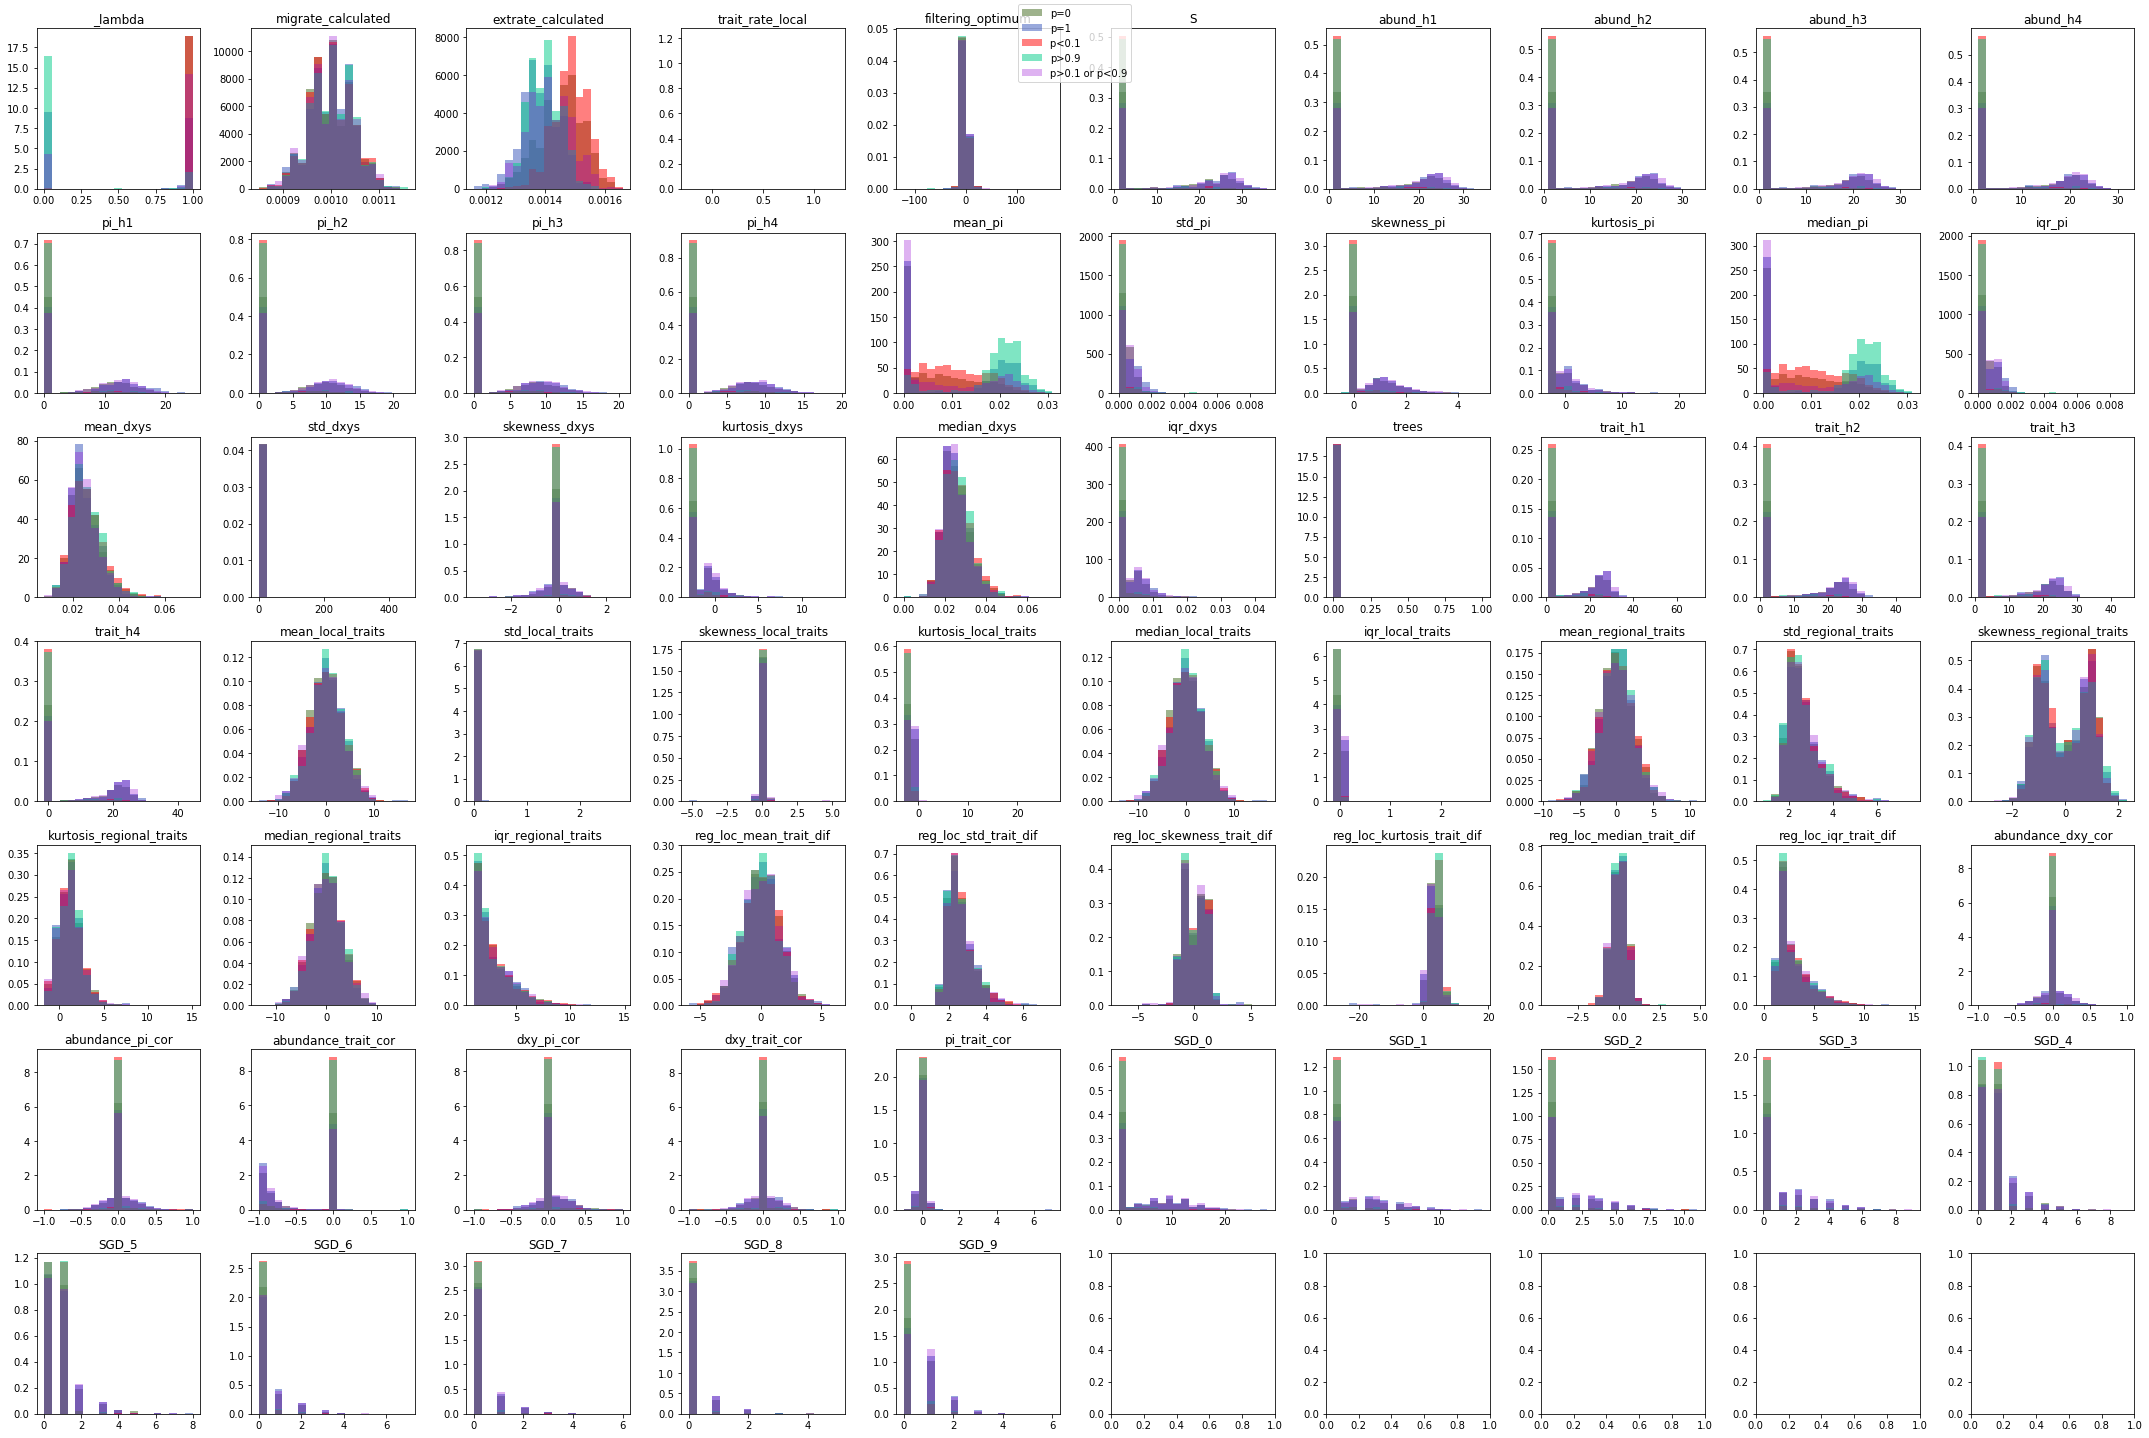

In [13]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
    pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
    ax.hist(pw0[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
    ax.hist(pw1[p], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
    ax.hist(pw_close0[p], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
    ax.hist(pw_close1[p], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
    ax.hist(pw_mid[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_mut_prop.png')

In [ ]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
    pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
    ax.hist(pw0[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
    #ax.hist(pw1["S"], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
    ax.hist(pw_close0[p], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
    #ax.hist(pw_close1["S"], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
    ax.hist(pw_mid[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_mut_prop0.png')

In [ ]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    pw_close0=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])<0.1]
    pw_close1=pw_close[pd.to_numeric(pw_close["mutualism_proportion"])>0.9]
    #ax.hist(pw0["S"], color='#3F681C', density=True, bins=b, alpha=0.5, label='p=0')
    ax.hist(pw1[p], color='#3755BB', density=True, bins=b, alpha=0.5, label='p=1')
    #ax.hist(pw_close0["S"], color='#FF0000', density=True, bins=b, alpha=0.5, label='p<0.1 ')
    ax.hist(pw_close1[p], color='#00CC88', density=True, bins=b, alpha=0.5, label='p>0.9')
    ax.hist(pw_mid[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='p>0.1 or p<0.9')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_identical_mut_prop1.png')

In [90]:
print(np.min(pairwise_competition["ecological_strength"]),np.max(pairwise_competition["ecological_strength"]))
pw_es_low=pairwise_competition[pd.to_numeric(pairwise_competition["ecological_strength"])<0.1]
pw_es_med=pairwise_competition[pd.to_numeric(pairwise_competition["ecological_strength"])<1]
pw_es_med=pw_es_med[pd.to_numeric(pw_es_med["ecological_strength"])>0.1]
pw_es_high=pairwise_competition[pd.to_numeric(pairwise_competition["ecological_strength"])<10]
pw_es_high=pw_es_high[pd.to_numeric(pw_es_high["ecological_strength"])>1]


0.010029999999999999 9.99463


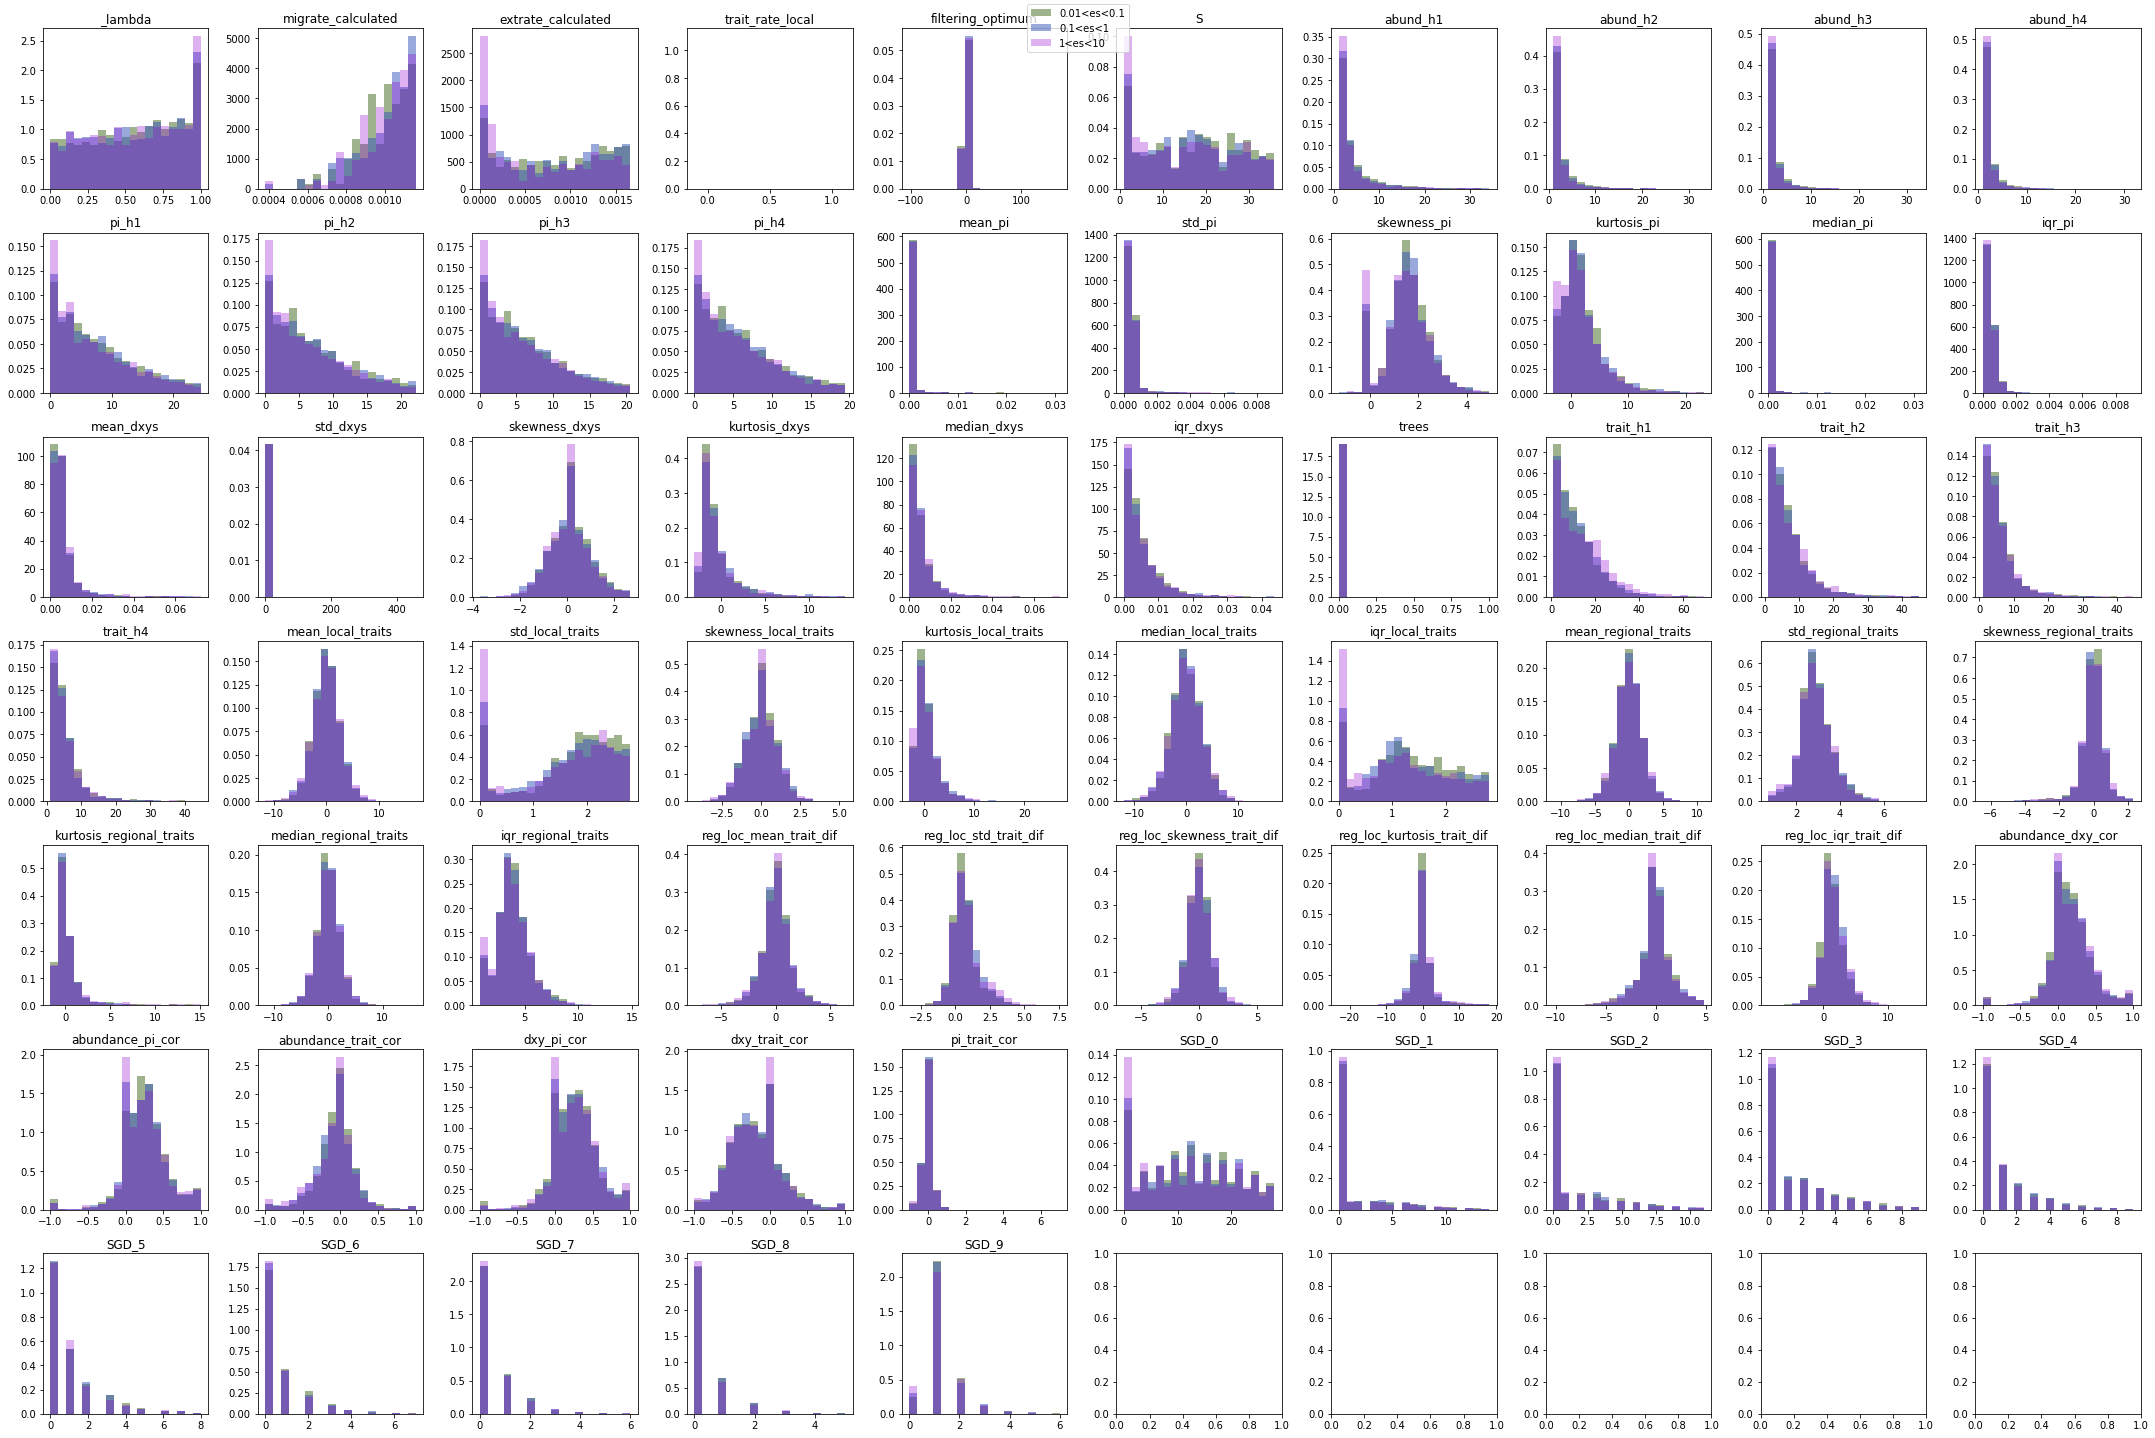

In [98]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_es_low[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='0.01<es<0.1')
    ax.hist(pw_es_med[p], color='#3755BB', density=True, bins=b, alpha=0.5, label='0.1<es<1')
    ax.hist(pw_es_high[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='1<es<10')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_ecol_strength.png')

In [119]:
print(np.min(pairwise_competition["m"]),np.max(pairwise_competition["m"]))
pw_m_low=pairwise_competition[pd.to_numeric(pairwise_competition["m"])<0.004]
pw_m_med=pairwise_competition[pd.to_numeric(pairwise_competition["m"])<0.1]
pw_m_med=pw_m_med[pd.to_numeric(pw_m_med["m"])>=0.004]
pw_m_high=pairwise_competition[pd.to_numeric(pairwise_competition["m"])<10]
pw_m_high=pw_m_high[pd.to_numeric(pw_m_high["m"])>1]
print(pw_m_low.shape, pw_m_med.shape, pw_m_high.shape)
print(pairwise_competition["m"])

0.001 0.01
(3880, 86) (2529, 86) (0, 86)
3746     0.00534
3748     0.00822
3785     0.00685
3792     0.00277
3810     0.00290
          ...   
30837    0.00136
30839    0.00701
30843    0.00473
30847    0.00446
30848    0.00605
Name: m, Length: 6409, dtype: float64


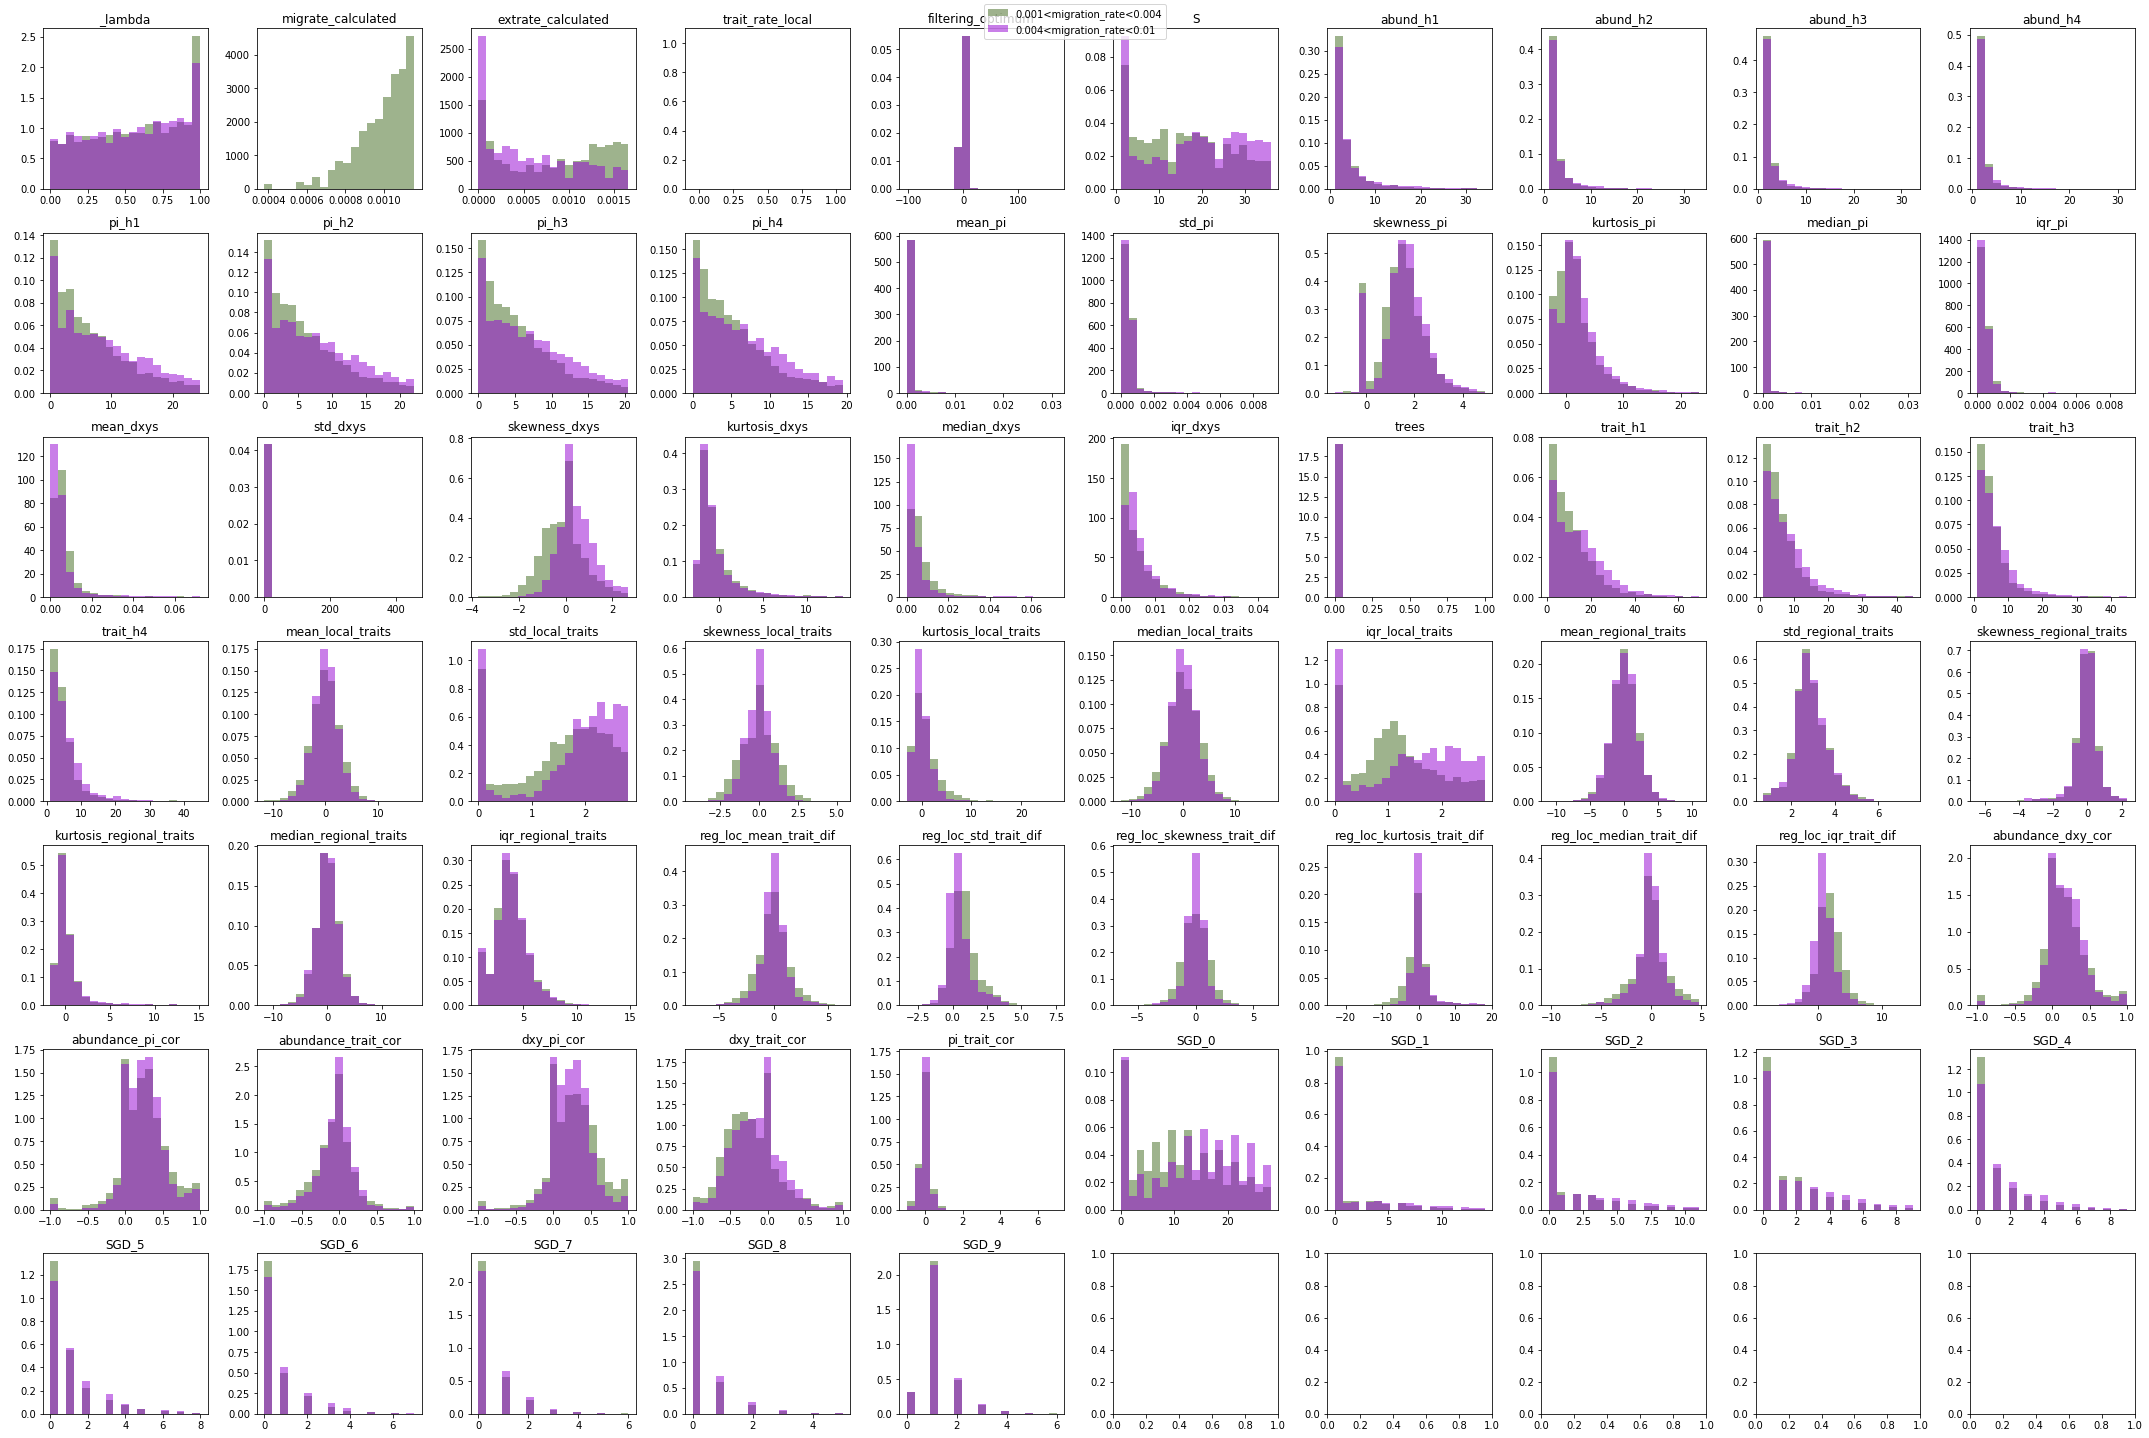

In [128]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_m_low[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='0.001<migration_rate<0.004')
    ax.hist(pw_m_med[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='0.004<migration_rate<0.01')
    #ax.hist(pw_m_high[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='1<es<10')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_migration_rate.png')

In [121]:
print(np.min(pairwise_competition["speciation_prob"]),np.max(pairwise_competition["speciation_prob"]))
pw_s_low=pairwise_competition[pd.to_numeric(pairwise_competition["speciation_prob"])<0.001]
pw_s_med=pairwise_competition[pd.to_numeric(pairwise_competition["speciation_prob"])<0.1]
pw_s_med=pw_s_med[pd.to_numeric(pw_s_med["speciation_prob"])>=0.001]
pw_s_high=pairwise_competition[pd.to_numeric(pairwise_competition["speciation_prob"])<10]
pw_s_high=pw_s_high[pd.to_numeric(pw_s_high["speciation_prob"])>1]
print(pw_m_low.shape, pw_s_med.shape, pw_s_high.shape)
print(pairwise_competition["speciation_prob"])

0.0005 0.005
(3880, 86) (4506, 86) (0, 86)
3746     0.00344
3748     0.00127
3785     0.00279
3792     0.00282
3810     0.00119
          ...   
30837    0.00241
30839    0.00060
30843    0.00145
30847    0.00175
30848    0.00188
Name: speciation_prob, Length: 6409, dtype: float64


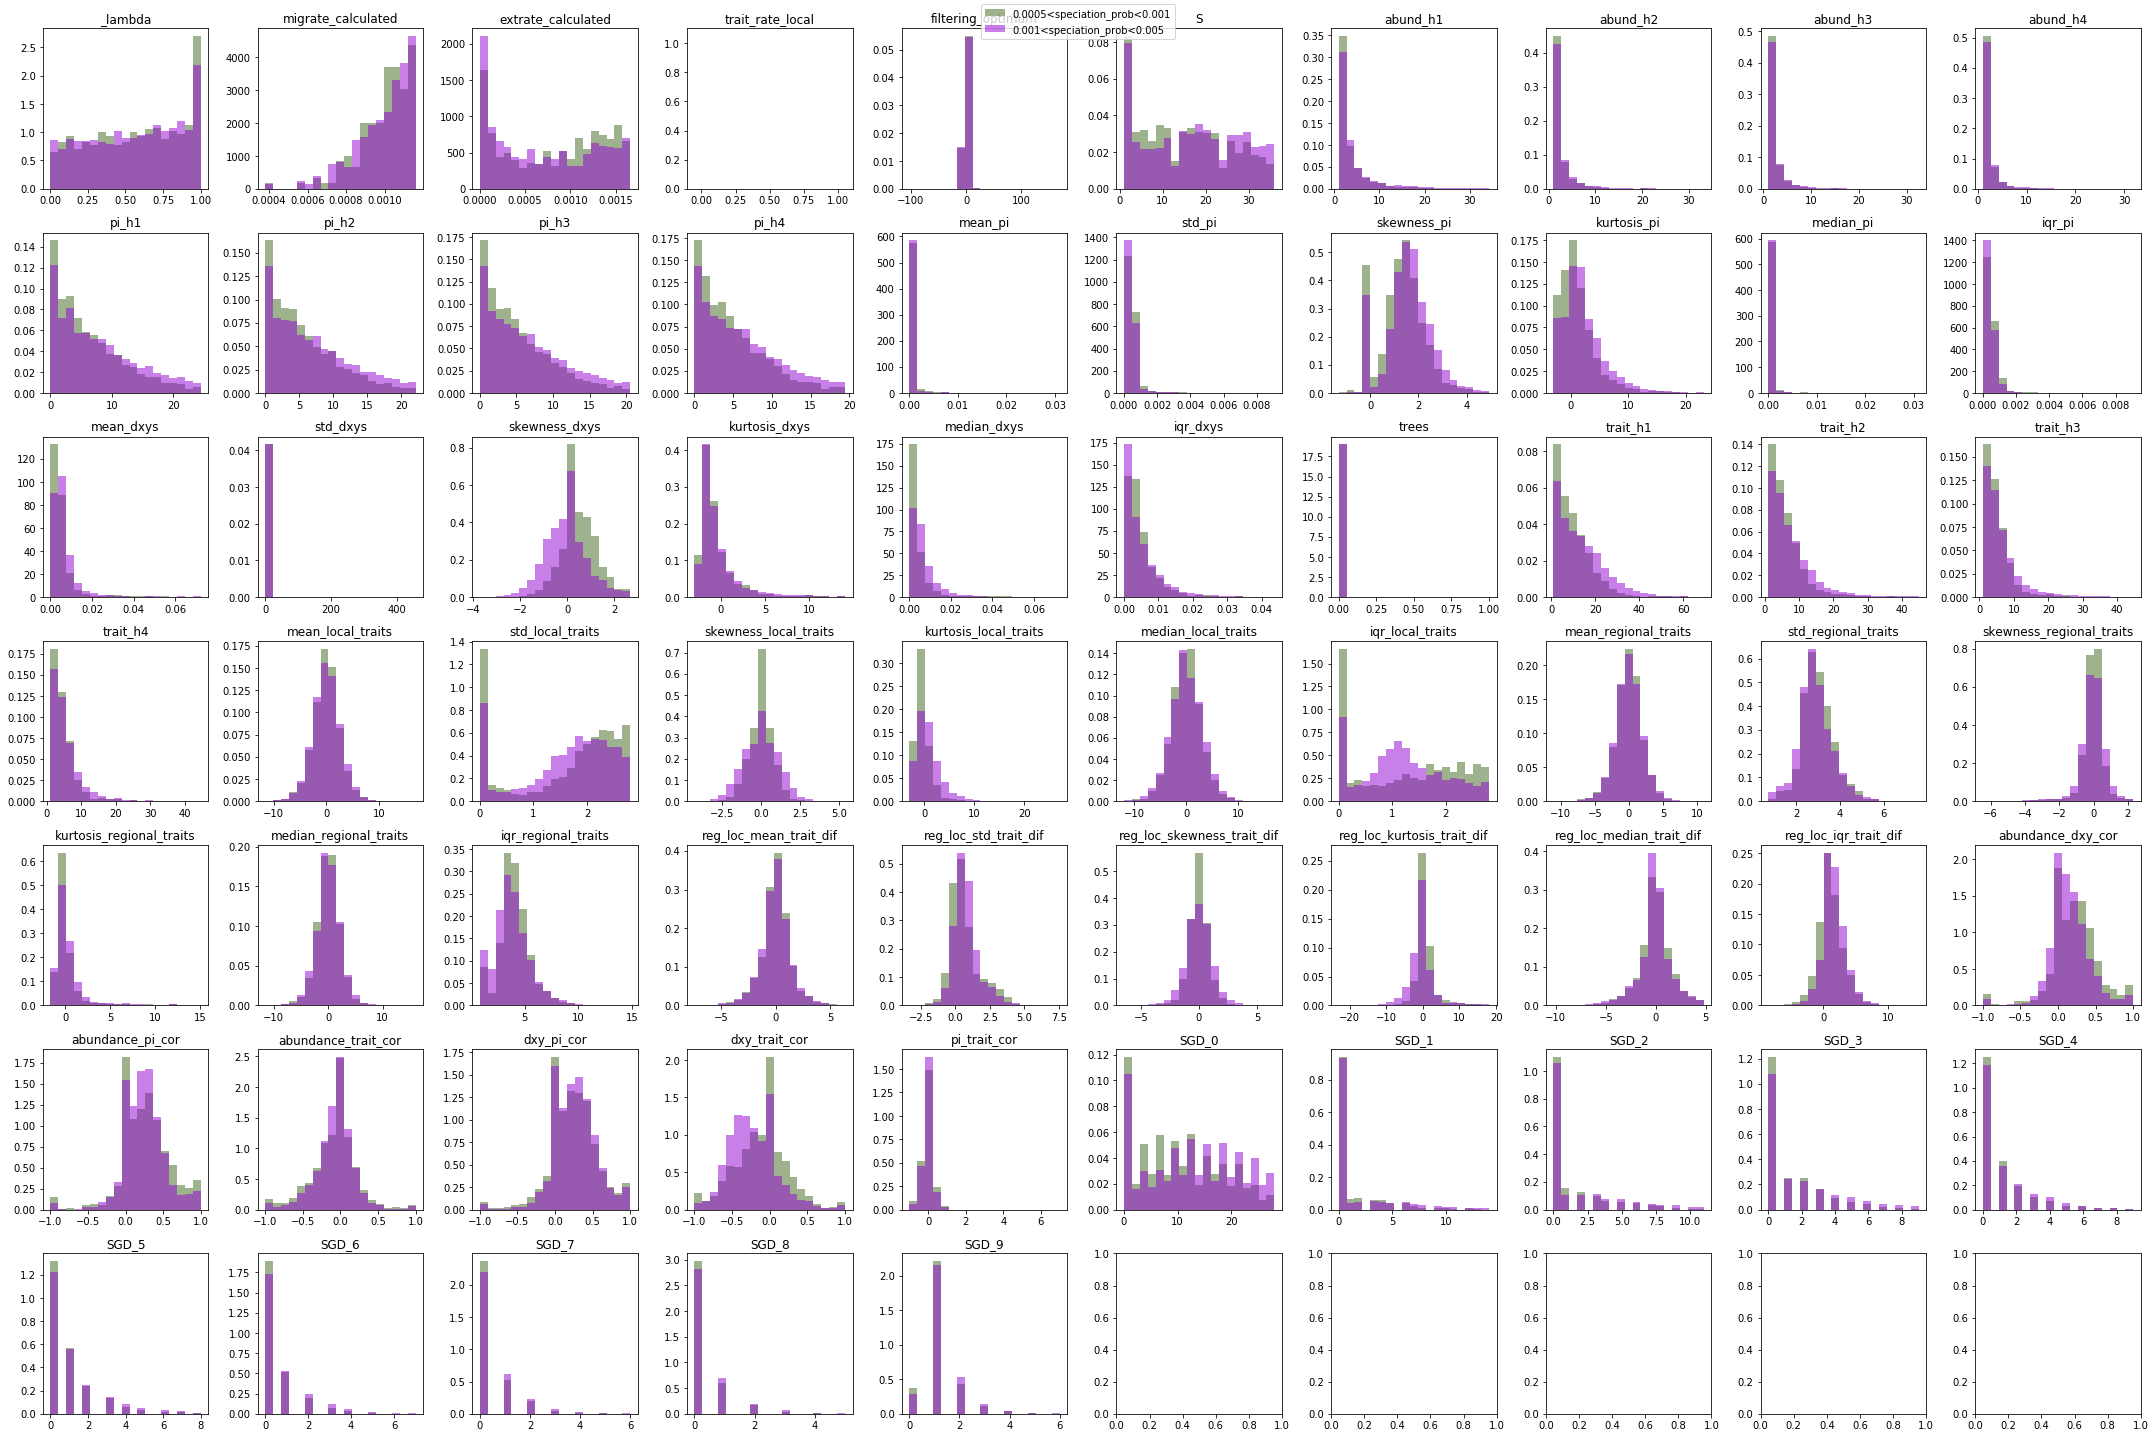

In [127]:
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes

for p, ax in zip(list(pairwise_competition.columns)[21:], axs):
    b=np.linspace(np.min(pairwise_competition[p]),np.max(pw_500[p]),20)
    ax.hist(pw_s_low[p], color='#3F681C', density=True, bins=b, alpha=0.5, label='0.0005<speciation_prob<0.001')
    ax.hist(pw_s_med[p], color='#9400D3', density=True, bins=b, alpha=0.5, label='0.001<speciation_prob<0.005')
    #ax.hist(pw_m_high[p], color='#9400D3', density=True, bins=b, alpha=0.3, label='1<es<10')
    ax.set_title(p)
    handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
fig.tight_layout()
plt.show
plt.savefig('./matrix_analysis_speciation_rate.png')